In [1]:
!pip install xverse

/bin/bash: /home/lumi/miniconda3/envs/ai/lib/libtinfo.so.6: no version information available (required by /bin/bash)


In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#from google.colab import drive
#drive.mount('/content/drive')


In [4]:
df = pd.read_csv('TCGA_GBM_LGG_Mutations_all.csv')

# df_fixed = pd.read_csv('TCGA_InfoWithGrade.csv')

cgga = pd.read_csv('CGGA_GBM_LGG.csv')

In [5]:
df.head(10)

,Grade,Project,Case_ID,Gender,Age_at_diagnosis,Primary_Diagnosis,Race,IDH1,TP53,ATRX,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,LGG,TCGA-LGG,TCGA-DU-8164,Male,51 years 108 days,"Oligodendroglioma, NOS",white,MUTATED,NOT_MUTATED,NOT_MUTATED,...,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
1,LGG,TCGA-LGG,TCGA-QH-A6CY,Male,38 years 261 days,Mixed glioma,white,MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
2,LGG,TCGA-LGG,TCGA-HW-A5KM,Male,35 years 62 days,"Astrocytoma, NOS",white,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
3,LGG,TCGA-LGG,TCGA-E1-A7YE,Female,32 years 283 days,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED
4,LGG,TCGA-LGG,TCGA-S9-A6WG,Male,31 years 187 days,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
5,LGG,TCGA-LGG,TCGA-DB-A4X9,Female,33 years 78 days,Mixed glioma,white,MUTATED,NOT_MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
6,LGG,TCGA-LGG,TCGA-P5-A5F4,Female,35 years 68 days,"Oligodendroglioma, anaplastic",white,MUTATED,MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
7,LGG,TCGA-LGG,TCGA-FG-A4MY,Female,44 years 239 days,Mixed glioma,white,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
8,LGG,TCGA-LGG,TCGA-HT-A5R5,Female,33 years 350 days,"Oligodendroglioma, NOS",white,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
9,LGG,TCGA-LGG,TCGA-DU-A76K,Male,87 years,"Oligodendroglioma, NOS",white,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED


In [6]:
# convert Age_at_diagnosis from year and days to year as float. ignore if the string is --
def convert_age(age):
    if age == '--':
        return 0
    else:
        age = age.split(' ')
        if len(age) == 2:
            return float(age[0])
        return int(age[0]) + int(age[2])/365
    
df['Age_at_diagnosis'] = df['Age_at_diagnosis'].apply(convert_age)

In [7]:
# print all rows where Age_at_diagnosis is 0
df[df['Age_at_diagnosis'] == 0]

,Grade,Project,Case_ID,Gender,Age_at_diagnosis,Primary_Diagnosis,Race,IDH1,TP53,ATRX,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
41,LGG,TCGA-LGG,TCGA-R8-A6YH,--,0.0,--,--,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
437,LGG,TCGA-LGG,TCGA-W9-A837,Male,0.0,"Oligodendroglioma, NOS",white,MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
671,GBM,TCGA-GBM,TCGA-28-2501,--,0.0,--,--,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
706,GBM,TCGA-GBM,TCGA-28-2510,--,0.0,--,--,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
794,GBM,TCGA-GBM,TCGA-16-1048,--,0.0,--,--,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED


In [8]:
# take the average of the age where the age is not 0
avg_age = df[df['Age_at_diagnosis'] != 0]['Age_at_diagnosis'].mean()
avg_age

# replace all 0 with the average age
df['Age_at_diagnosis'] = df['Age_at_diagnosis'].replace(0, avg_age)

In [9]:
# show rows 41, 437, 671, 706, 794
df.iloc[[41, 437, 671, 706, 794]]

,Grade,Project,Case_ID,Gender,Age_at_diagnosis,Primary_Diagnosis,Race,IDH1,TP53,ATRX,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
41,LGG,TCGA-LGG,TCGA-R8-A6YH,--,50.924471,--,--,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
437,LGG,TCGA-LGG,TCGA-W9-A837,Male,50.924471,"Oligodendroglioma, NOS",white,MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
671,GBM,TCGA-GBM,TCGA-28-2501,--,50.924471,--,--,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
706,GBM,TCGA-GBM,TCGA-28-2510,--,50.924471,--,--,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
794,GBM,TCGA-GBM,TCGA-16-1048,--,50.924471,--,--,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED


In [10]:
# for Gender column, fill in the missing values with the most frequent value
gender_freq = df['Gender'].mode()[0]
df['Gender'] = df['Gender'].replace('--', gender_freq)

In [11]:
df.iloc[[41, 437, 671, 706, 794]]

,Grade,Project,Case_ID,Gender,Age_at_diagnosis,Primary_Diagnosis,Race,IDH1,TP53,ATRX,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
41,LGG,TCGA-LGG,TCGA-R8-A6YH,Male,50.924471,--,--,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
437,LGG,TCGA-LGG,TCGA-W9-A837,Male,50.924471,"Oligodendroglioma, NOS",white,MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
671,GBM,TCGA-GBM,TCGA-28-2501,Male,50.924471,--,--,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
706,GBM,TCGA-GBM,TCGA-28-2510,Male,50.924471,--,--,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
794,GBM,TCGA-GBM,TCGA-16-1048,Male,50.924471,--,--,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED


In [12]:
# replace all primary_diagnosis and race where -- with not reported
df['Primary_Diagnosis'] = df['Primary_Diagnosis'].replace('--', 'not reported')
df['Race'] = df['Race'].replace('--', 'not reported')


Text(0.5, 1.0, 'Cancer Grade Counts')

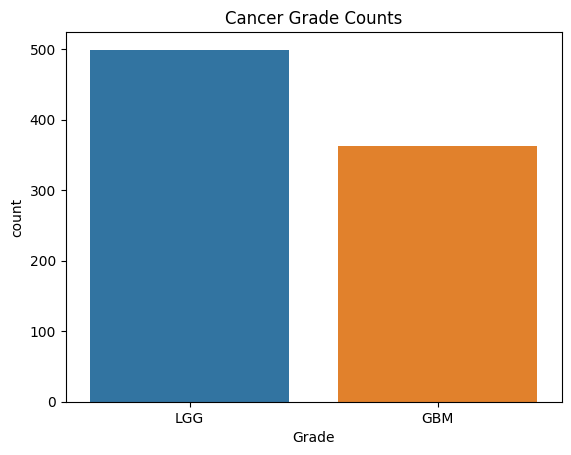

In [13]:
sns.countplot(data = df, x = "Grade")
plt.title("Cancer Grade Counts")

In [14]:
print(df['Grade'].value_counts())

LGG    499
GBM    363
Name: Grade, dtype: int64


Text(0.5, 1.0, 'All instances')

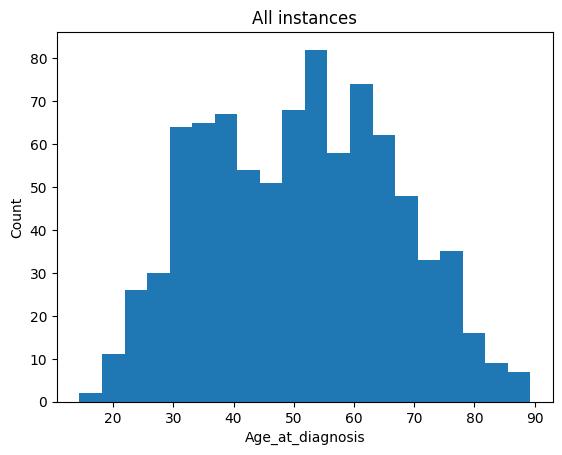

In [15]:
plt.hist(df['Age_at_diagnosis'], bins = 20)
plt.xlabel('Age_at_diagnosis')
plt.ylabel('Count')
plt.title("All instances")

Text(0.5, 1.0, 'Grade = LGG')

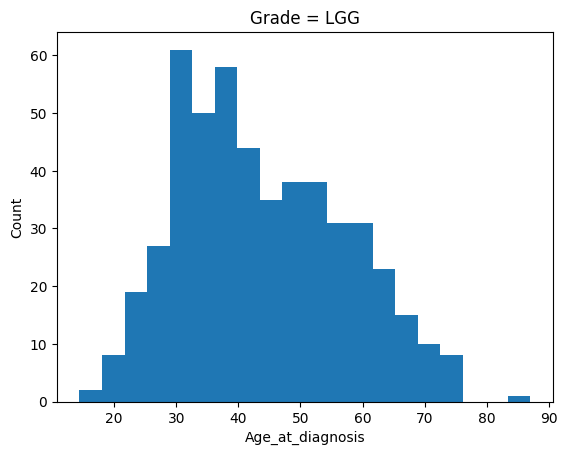

In [16]:
plt.hist(df[df['Grade'] == 'LGG']['Age_at_diagnosis'], bins = 20)
plt.xlabel('Age_at_diagnosis')
plt.ylabel('Count')
plt.title("Grade = LGG")

Text(0.5, 1.0, 'Grade = GBM')

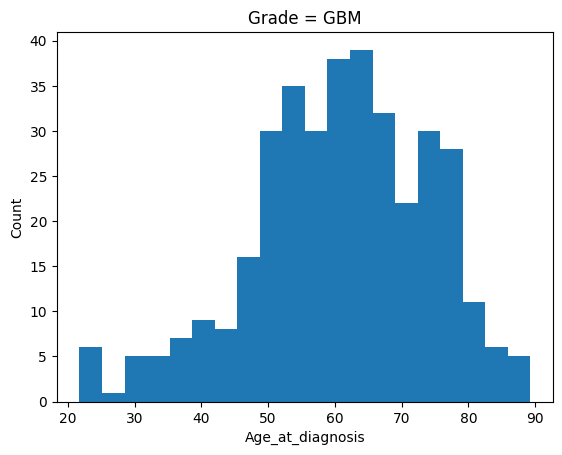

In [17]:
plt.hist(df[df['Grade'] == 'GBM']['Age_at_diagnosis'], bins = 20)
plt.xlabel('Age_at_diagnosis')
plt.ylabel('Count')
plt.title("Grade = GBM")

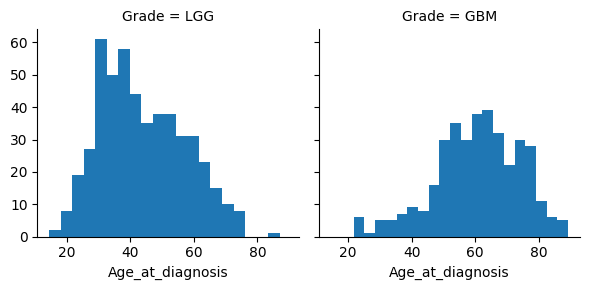

In [18]:
grid = sns.FacetGrid(df, col = "Grade")
grid.map(plt.hist, 'Age_at_diagnosis', bins = 20)

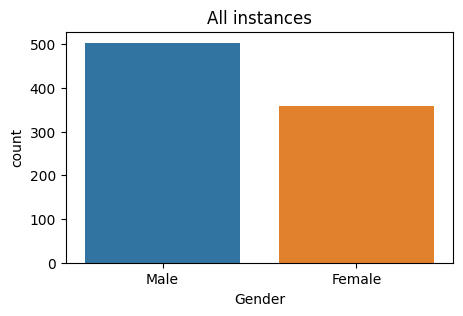

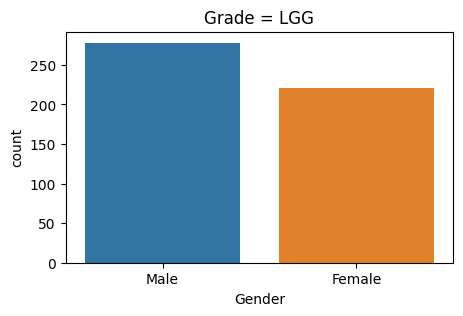

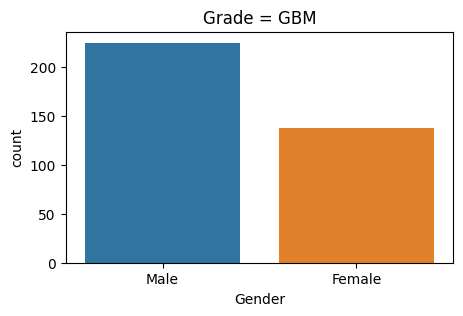

In [19]:
# plt.figure(figsize=(3, 3))
# sns.countplot(data = df, x = "Gender")
# plt.title("All instances")
# plt.show()

plt.figure(figsize=(5, 3))
sns.countplot(data = df, x = "Gender", order = ['Male', 'Female'])
plt.title("All instances")
plt.figure(figsize=(5, 3))
sns.countplot(data =  df[df['Grade'] == "LGG"], x = "Gender", order = ['Male', 'Female'])
plt.title("Grade = LGG")
plt.figure(figsize=(5, 3))
sns.countplot(data =  df[df['Grade'] == "GBM"], x = "Gender", order = ['Male', 'Female'])
plt.title("Grade = GBM")
plt.show()

In [20]:
# grid = sns.FacetGrid(df, col = "Grade")
# grid.map(sns.countplot, 'Gender', order = ['Male', 'Female'])

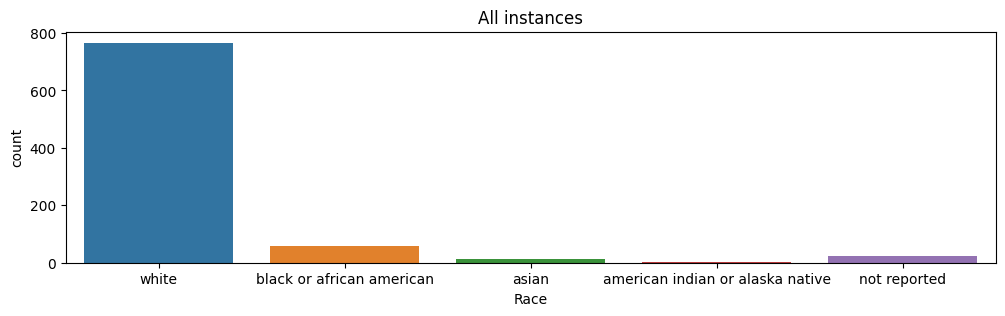

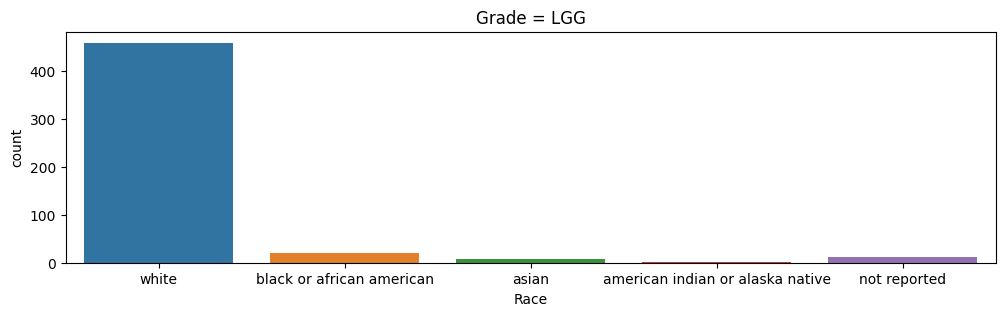

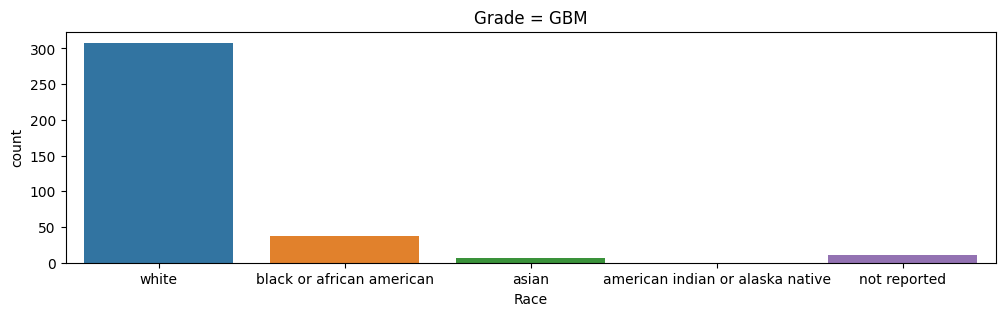

In [21]:
plt.figure(figsize=(12, 3))
sns.countplot(data = df, x = "Race", order = ['white', 'black or african american', 'asian', 'american indian or alaska native', 'not reported'])
plt.title("All instances")
plt.figure(figsize=(12, 3))
sns.countplot(data = df[df['Grade'] == "LGG"], x = "Race", order = ['white', 'black or african american', 'asian', 'american indian or alaska native', 'not reported'])
plt.title("Grade = LGG")
plt.figure(figsize=(12, 3))
sns.countplot(data = df[df['Grade'] == "GBM"], x = "Race", order = ['white', 'black or african american', 'asian', 'american indian or alaska native', 'not reported'])
plt.title("Grade = GBM")
plt.show()

<Axes: xlabel='Race'>

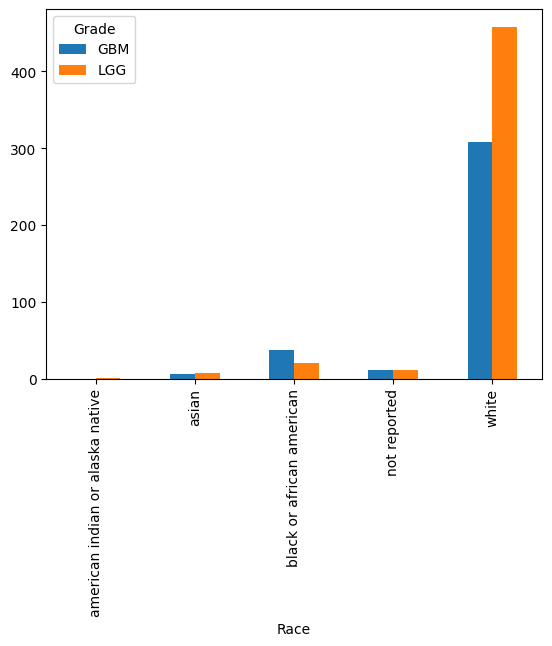

In [22]:
# for each race, show the count of each grade
banana = df.groupby('Race')['Grade'].value_counts()
banana_counts = banana.unstack(level = 1)

# replace nan with 0
banana_counts = banana_counts.fillna(0)

# plot the bar chart
banana_counts.plot(kind = 'bar')

In [23]:
gene_columns = ['IDH1', 'TP53', 'ATRX', 'PTEN', 'EGFR', 'CIC', 'MUC16', 'PIK3CA', 'NF1', 'PIK3R1', 'FUBP1', 'RB1', 'NOTCH1','BCOR', 'CSMD3', 'SMARCA4', 'GRIN2A', 'IDH2', 'FAT4', 'PDGFRA']

In [24]:
# for the genes, rename NOT_MUTATED to 0 and MUTATED to 1
df = df.replace('NOT_MUTATED', 0)
df = df.replace('MUTATED', 1)

# convert the gene columns to int
for col in gene_columns:
    df[col] = df[col].astype(int)

df.head()

,Grade,Project,Case_ID,Gender,Age_at_diagnosis,Primary_Diagnosis,Race,IDH1,TP53,ATRX,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,LGG,TCGA-LGG,TCGA-DU-8164,Male,51.295890,"Oligodendroglioma, NOS",white,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,LGG,TCGA-LGG,TCGA-QH-A6CY,Male,38.715068,Mixed glioma,white,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,LGG,TCGA-LGG,TCGA-HW-A5KM,Male,35.169863,"Astrocytoma, NOS",white,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,LGG,TCGA-LGG,TCGA-E1-A7YE,Female,32.775342,"Astrocytoma, anaplastic",white,1,1,1,...,0,0,0,0,0,0,0,0,1,0
4,LGG,TCGA-LGG,TCGA-S9-A6WG,Male,31.512329,"Astrocytoma, anaplastic",white,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# replace LGG with 0 and GBM with 1
df['Grade'] = df['Grade'].replace('LGG', 0)
df['Grade'] = df['Grade'].replace('GBM', 1)

# factorize gender
df['Gender'] = df['Gender'].factorize()[0]
df.head()

,Grade,Project,Case_ID,Gender,Age_at_diagnosis,Primary_Diagnosis,Race,IDH1,TP53,ATRX,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,0,TCGA-LGG,TCGA-DU-8164,0,51.295890,"Oligodendroglioma, NOS",white,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,TCGA-LGG,TCGA-QH-A6CY,0,38.715068,Mixed glioma,white,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,TCGA-LGG,TCGA-HW-A5KM,0,35.169863,"Astrocytoma, NOS",white,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,TCGA-LGG,TCGA-E1-A7YE,1,32.775342,"Astrocytoma, anaplastic",white,1,1,1,...,0,0,0,0,0,0,0,0,1,0
4,0,TCGA-LGG,TCGA-S9-A6WG,0,31.512329,"Astrocytoma, anaplastic",white,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [26]:
genes = df[['IDH1', 'TP53', 'ATRX', 'PTEN', 'EGFR', 'CIC', 'MUC16', 'PIK3CA', 'NF1', 'PIK3R1', 'FUBP1', 'RB1', 'NOTCH1','BCOR', 'CSMD3', 'SMARCA4', 'GRIN2A', 'IDH2', 'FAT4', 'PDGFRA']]

In [27]:
genes.apply(pd.Series.value_counts)

,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,PIK3CA,NF1,PIK3R1,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,448,508,642,718,748,748,762,785,793,805,815,821,824,833,834,834,835,839,839,840
1,414,354,220,144,114,114,100,77,69,57,47,41,38,29,28,28,27,23,23,22


In [28]:
# df_fixed = pd.read_csv('TCGA_InfoWithGrade.csv')

# sum the genes by column
# gene_sum = genes.sum(axis = 0)
# gene_sum

# # show the percentage of mutated genes for each gene in a bar chart as a percentage of the total number of instances
# gene_sum = gene_sum / len(df)
# gene_sum = gene_sum * 100
# gene_sum

# # plot the bar chart
# gene_sum.plot(kind = 'bar')

In [29]:
genes_split = df[['Grade', 'IDH1', 'TP53', 'ATRX', 'PTEN', 'EGFR', 'CIC', 'MUC16', 'PIK3CA', 'NF1', 'PIK3R1', 'FUBP1', 'RB1', 'NOTCH1','BCOR', 'CSMD3', 'SMARCA4', 'GRIN2A', 'IDH2', 'FAT4', 'PDGFRA']]
genes_lgg = genes_split[genes_split['Grade'] == 0]
genes_gbm = genes_split[genes_split['Grade'] == 1]

genes_lgg = genes_lgg.drop('Grade', axis = 1)
genes_gbm = genes_gbm.drop('Grade', axis = 1)

Text(0.5, 1.0, 'Distribution of Gene Mutations in All Cases')

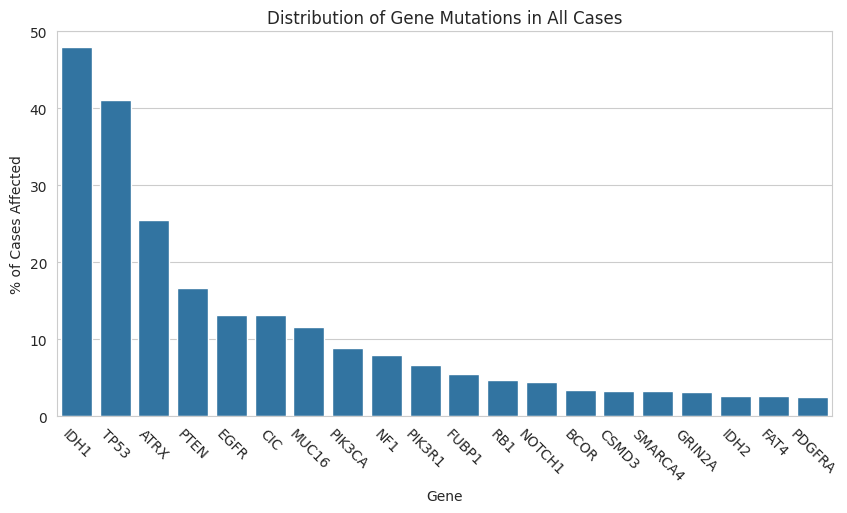

In [30]:
# plot the bar chart of ther overall gene mutation percentages
gene_sum = genes.sum(axis = 0)
gene_sum = gene_sum / len(df)
gene_sum = gene_sum * 100

# bar chart with seaborn and and normal light blue color, like in matplotlib, show the gene names at a 45 degree angle
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
sns.barplot(x = gene_sum.index, y = gene_sum.values, color = '#1f77b4')
plt.xticks(rotation = -45)

# set upper limit of y axis to 50
plt.ylim(0, 50)

plt.xlabel('Gene')
plt.ylabel('% of Cases Affected')
plt.title('Distribution of Gene Mutations in All Cases')

IDH1       78.356713
TP53       47.695391
ATRX       37.074148
CIC        22.044088
FUBP1       9.018036
MUC16       8.216433
PIK3CA      8.216433
NOTCH1      7.615230
EGFR        6.212425
NF1         5.811623
PTEN        5.010020
SMARCA4     4.809619
PIK3R1      4.408818
IDH2        4.208417
BCOR        3.406814
CSMD3       2.605210
FAT4        2.204409
GRIN2A      1.402806
RB1         1.202405
PDGFRA      1.202405
dtype: float64


Text(0.5, 1.0, 'Distribution of Gene Mutations in LGG')

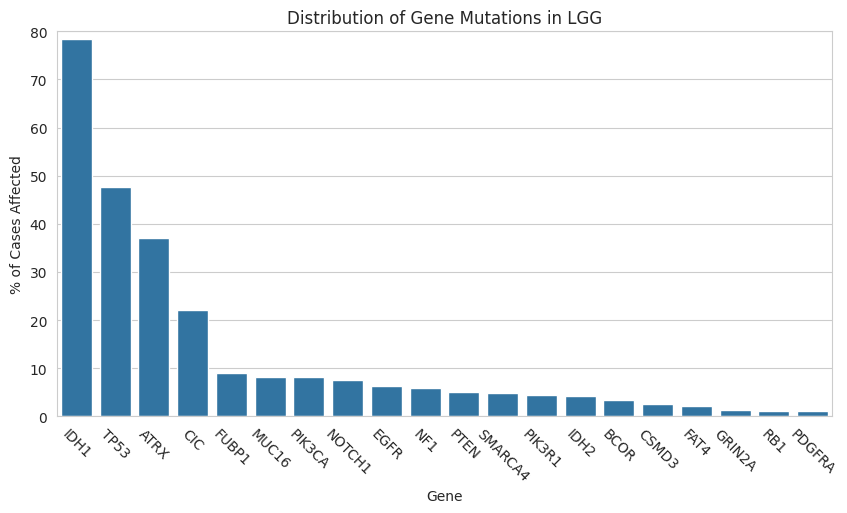

In [31]:
# gene_lgg_freqs = genes_lgg.apply(pd.Series.value_counts).loc[1] / len(genes_lgg) * 100
# print(gene_lgg_freqs)
# gene_lgg_freqs = gene_lgg_freqs.sort_values(ascending=False)
# gene_lgg_freqs.plot.bar()
# plt.xlabel('Gene')
# plt.ylabel('\% of Cases Affected')
# plt.title("Distribution of Gene Mutations in LGG")

# plot gene mutation percentages for LGG
genes_lgg = df[df['Grade'] == 0][['IDH1', 'TP53', 'ATRX', 'PTEN', 'EGFR', 'CIC', 'MUC16', 'PIK3CA', 'NF1', 'PIK3R1', 'FUBP1', 'RB1', 'NOTCH1','BCOR', 'CSMD3', 'SMARCA4', 'GRIN2A', 'IDH2', 'FAT4', 'PDGFRA']]
gene_lgg_sum = genes_lgg.sum(axis = 0)
gene_lgg_sum = gene_lgg_sum / len(genes_lgg)
gene_lgg_sum = gene_lgg_sum * 100

# sort the genes by the percentage of cases affected
gene_lgg_sum = gene_lgg_sum.sort_values(ascending=False)

print(gene_lgg_sum)
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
sns.barplot(x = gene_lgg_sum.index, y = gene_lgg_sum.values, color = '#1f77b4')
plt.xticks(rotation = -45)

# set upper limit of y axis to 80
plt.ylim(0, 80)

plt.xlabel('Gene')
plt.ylabel('% of Cases Affected')
plt.title("Distribution of Gene Mutations in LGG")


PTEN       32.782369
TP53       31.955923
EGFR       22.865014
MUC16      16.253444
NF1        11.019284
PIK3CA      9.917355
RB1         9.641873
ATRX        9.641873
PIK3R1      9.641873
IDH1        6.336088
GRIN2A      5.509642
PDGFRA      4.407713
CSMD3       4.132231
BCOR        3.305785
FAT4        3.305785
SMARCA4     1.101928
CIC         1.101928
IDH2        0.550964
FUBP1       0.550964
NOTCH1      0.000000
dtype: float64


Text(0.5, 1.0, 'Distribution of Gene Mutations in GBM')

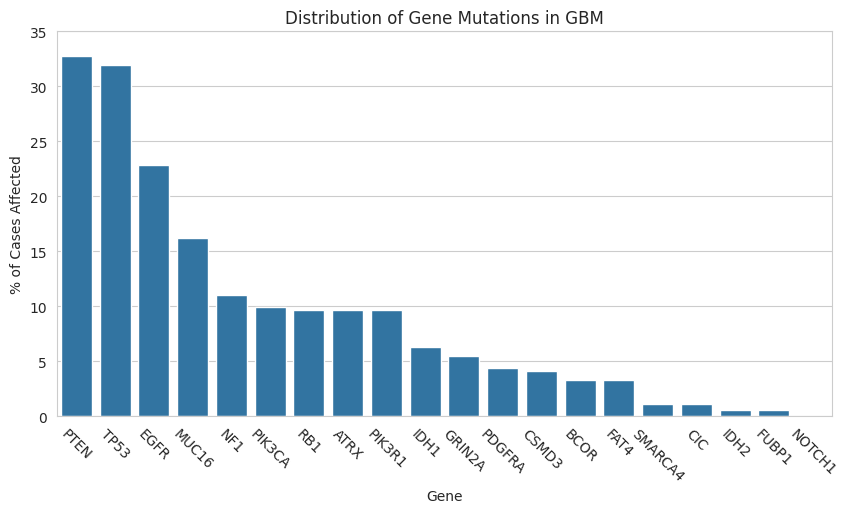

In [32]:
# gene_gbm_freqs = genes_gbm.apply(pd.Series.value_counts).loc[1] / len(genes_gbm) * 100
# gene_gbm_freqs = gene_gbm_freqs.sort_values(ascending=False)
# gene_gbm_freqs.plot.bar()
# plt.xlabel('Gene')
# plt.ylabel('\% of Cases Affected')
# plt.title("Distribution of Gene Mutations in GBM")

# plot gene mutation percentages for GBM
genes_gbm = df[df['Grade'] == 1][['IDH1', 'TP53', 'ATRX', 'PTEN', 'EGFR', 'CIC', 'MUC16', 'PIK3CA', 'NF1', 'PIK3R1', 'FUBP1', 'RB1', 'NOTCH1','BCOR', 'CSMD3', 'SMARCA4', 'GRIN2A', 'IDH2', 'FAT4', 'PDGFRA']]
gene_gbm_sum = genes_gbm.sum(axis = 0)
gene_gbm_sum = gene_gbm_sum / len(genes_gbm)
gene_gbm_sum = gene_gbm_sum * 100

# sort the genes by the percentage of cases affected
gene_gbm_sum = gene_gbm_sum.sort_values(ascending=False)

print(gene_gbm_sum)

plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
sns.barplot(x = gene_gbm_sum.index, y = gene_gbm_sum.values, color = '#1f77b4')
plt.xticks(rotation = -45)

plt.ylim(0, 35)

plt.xlabel('Gene')
plt.ylabel('% of Cases Affected')
plt.title("Distribution of Gene Mutations in GBM")

In [33]:
df.describe()

,Grade,Gender,Age_at_diagnosis,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
count,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,...,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000
mean,0.421114,0.416473,50.924471,0.480278,0.410673,0.255220,0.167053,0.132251,0.132251,0.116009,...,0.054524,0.047564,0.044084,0.033643,0.032483,0.032483,0.031323,0.026682,0.026682,0.025522
std,0.494024,0.493260,15.687049,0.499901,0.492242,0.436238,0.373240,0.338960,0.338960,0.320422,...,0.227181,0.212965,0.205400,0.180412,0.177381,0.177381,0.174289,0.161246,0.161246,0.157796
min,0.000000,0.000000,14.421918,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,38.035616,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,51.390411,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,62.634932,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,89.287671,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
# gen_split = df
# gen_female = gen_split[gen_split['Gender'] == 0][['IDH1', 'TP53', 'ATRX', 'PTEN', 'EGFR', 'CIC', 'MUC16', 'PIK3CA', 'NF1', 'PIK3R1', 'FUBP1', 'RB1', 'NOTCH1','BCOR', 'CSMD3', 'SMARCA4', 'GRIN2A', 'IDH2', 'FAT4', 'PDGFRA']]
# gen_male = gen_split[gen_split['Gender'] == 1][['IDH1', 'TP53', 'ATRX', 'PTEN', 'EGFR', 'CIC', 'MUC16', 'PIK3CA', 'NF1', 'PIK3R1', 'FUBP1', 'RB1', 'NOTCH1','BCOR', 'CSMD3', 'SMARCA4', 'GRIN2A', 'IDH2', 'FAT4', 'PDGFRA']]

# gen_female = gen_female.drop('Gender', axis = 1)
# gen_male = gen_male.drop('Gender', axis = 1)

IDH1       50.696379
TP53       41.225627
ATRX       28.690808
CIC        15.877437
PTEN       15.320334
EGFR       11.977716
MUC16      11.977716
PIK3CA      8.913649
NF1         8.077994
FUBP1       5.849582
RB1         5.292479
PIK3R1      5.013928
BCOR        5.013928
NOTCH1      4.456825
CSMD3       4.178273
FAT4        3.899721
SMARCA4     3.064067
GRIN2A      3.064067
IDH2        3.064067
PDGFRA      3.064067
dtype: float64


Text(0.5, 1.0, 'Distribution of Gene Mutations for Females')

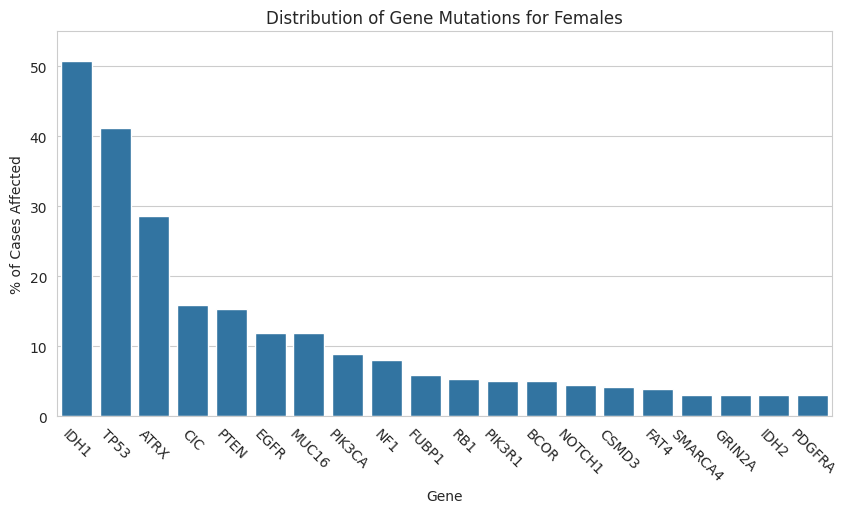

In [35]:
# gen_female_freqs = gen_female.apply(pd.Series.value_counts).loc[1] / len(gen_female) * 100
# gen_female_freqs = gen_female_freqs.sort_values(ascending=False)
# gen_female_freqs.plot.bar()
# plt.xlabel('Gene mutation')
# plt.ylabel('Frequency (%)')
# plt.title("Gender = Female")

# Plot gene mutation for female]

genes_female = df[df['Gender'] == 1][['IDH1', 'TP53', 'ATRX', 'PTEN', 'EGFR', 'CIC', 'MUC16', 'PIK3CA', 'NF1', 'PIK3R1', 'FUBP1', 'RB1', 'NOTCH1','BCOR', 'CSMD3', 'SMARCA4', 'GRIN2A', 'IDH2', 'FAT4', 'PDGFRA']]
genes_female_sum = genes_female.sum(axis = 0)
genes_female_sum = genes_female_sum / len(genes_female)
genes_female_sum *= 100

genes_female_sum = genes_female_sum.sort_values(ascending=False)

print(genes_female_sum)

plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
sns.barplot(x = genes_female_sum.index, y = genes_female_sum.values, color = '#1f77b4')
plt.xticks(rotation = -45)

plt.ylim(0, 55)

plt.xlabel('Gene')
plt.ylabel('% of Cases Affected')
plt.title("Distribution of Gene Mutations for Females")

IDH1       46.123260
TP53       40.954274
ATRX       23.260437
PTEN       17.693837
EGFR       14.115308
CIC        11.332008
MUC16      11.332008
PIK3CA      8.946322
NF1         7.952286
PIK3R1      7.753479
FUBP1       5.168986
RB1         4.373757
NOTCH1      4.373757
SMARCA4     3.379722
GRIN2A      3.180915
CSMD3       2.584493
IDH2        2.385686
BCOR        2.186879
PDGFRA      2.186879
FAT4        1.789264
dtype: float64


Text(0.5, 1.0, 'Distribution of Gene Mutations for Males')

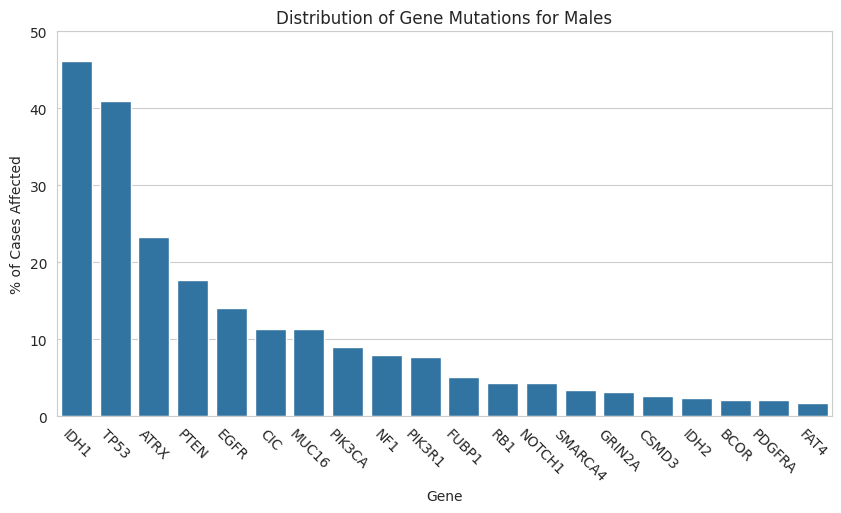

In [36]:
genes_male = df[df['Gender'] == 0][['IDH1', 'TP53', 'ATRX', 'PTEN', 'EGFR', 'CIC', 'MUC16', 'PIK3CA', 'NF1', 'PIK3R1', 'FUBP1', 'RB1', 'NOTCH1','BCOR', 'CSMD3', 'SMARCA4', 'GRIN2A', 'IDH2', 'FAT4', 'PDGFRA']]
genes_male_sum = genes_male.sum(axis = 0)
genes_male_sum = genes_male_sum / len(genes_male)
genes_male_sum *= 100

genes_male_sum = genes_male_sum.sort_values(ascending=False)

print(genes_male_sum)

plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
sns.barplot(x = genes_male_sum.index, y = genes_male_sum.values, color = '#1f77b4')
plt.xticks(rotation = -45)

plt.ylim(0, 50)

plt.xlabel('Gene')
plt.ylabel('% of Cases Affected')
plt.title("Distribution of Gene Mutations for Males")

Analysis: Gender is not significant for genetic markers

# Real Data Preprocessing

Dropping Race, Primary Diagnosis, Case_ID, Project

In [37]:
glioma_raw = pd.read_csv('TCGA_GBM_LGG_Mutations_all.csv')
glioma_raw

,Grade,Project,Case_ID,Gender,Age_at_diagnosis,Primary_Diagnosis,Race,IDH1,TP53,ATRX,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,LGG,TCGA-LGG,TCGA-DU-8164,Male,51 years 108 days,"Oligodendroglioma, NOS",white,MUTATED,NOT_MUTATED,NOT_MUTATED,...,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
1,LGG,TCGA-LGG,TCGA-QH-A6CY,Male,38 years 261 days,Mixed glioma,white,MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
2,LGG,TCGA-LGG,TCGA-HW-A5KM,Male,35 years 62 days,"Astrocytoma, NOS",white,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
3,LGG,TCGA-LGG,TCGA-E1-A7YE,Female,32 years 283 days,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED
4,LGG,TCGA-LGG,TCGA-S9-A6WG,Male,31 years 187 days,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,GBM,TCGA-GBM,TCGA-19-5959,Female,77 years 325 days,Glioblastoma,white,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
858,GBM,TCGA-GBM,TCGA-16-0846,Male,85 years 65 days,Glioblastoma,white,NOT_MUTATED,MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
859,GBM,TCGA-GBM,TCGA-28-1746,Female,77 years 178 days,Glioblastoma,white,NOT_MUTATED,MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
860,GBM,TCGA-GBM,TCGA-32-2491,Male,63 years 121 days,Glioblastoma,white,NOT_MUTATED,MUTATED,NOT_MUTATED,...,NOT_MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED


In [38]:
glioma = glioma_raw.drop(['Race', 'Project', 'Case_ID', 'Primary_Diagnosis'], axis = 1)
glioma

,Grade,Gender,Age_at_diagnosis,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,LGG,Male,51 years 108 days,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
1,LGG,Male,38 years 261 days,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
2,LGG,Male,35 years 62 days,MUTATED,MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
3,LGG,Female,32 years 283 days,MUTATED,MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED
4,LGG,Male,31 years 187 days,MUTATED,MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,GBM,Female,77 years 325 days,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
858,GBM,Male,85 years 65 days,NOT_MUTATED,MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
859,GBM,Female,77 years 178 days,NOT_MUTATED,MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
860,GBM,Male,63 years 121 days,NOT_MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,...,NOT_MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED


In [39]:
glioma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862 entries, 0 to 861
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Grade             862 non-null    object
 1   Gender            862 non-null    object
 2   Age_at_diagnosis  862 non-null    object
 3   IDH1              862 non-null    object
 4   TP53              862 non-null    object
 5   ATRX              862 non-null    object
 6   PTEN              862 non-null    object
 7   EGFR              862 non-null    object
 8   CIC               862 non-null    object
 9   MUC16             862 non-null    object
 10  PIK3CA            862 non-null    object
 11  NF1               862 non-null    object
 12  PIK3R1            862 non-null    object
 13  FUBP1             862 non-null    object
 14  RB1               862 non-null    object
 15  NOTCH1            862 non-null    object
 16  BCOR              862 non-null    object
 17  CSMD3           

In [40]:
glioma.describe()

,Grade,Gender,Age_at_diagnosis,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
count,862,862,862,862,862,862,862,862,862,862,...,862,862,862,862,862,862,862,862,862,862
unique,2,3,838,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,LGG,Male,--,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
freq,499,499,5,448,508,642,718,748,748,762,...,815,821,824,833,834,834,835,839,839,840


Convert genetic markers to numeric

In [41]:
glioma.columns

Index(['Grade', 'Gender', 'Age_at_diagnosis', 'IDH1', 'TP53', 'ATRX', 'PTEN',
       'EGFR', 'CIC', 'MUC16', 'PIK3CA', 'NF1', 'PIK3R1', 'FUBP1', 'RB1',
       'NOTCH1', 'BCOR', 'CSMD3', 'SMARCA4', 'GRIN2A', 'IDH2', 'FAT4',
       'PDGFRA'],
      dtype='object')

In [42]:
genetic_markers = list(glioma.columns[3:])
genetic_markers

['IDH1',
 'TP53',
 'ATRX',
 'PTEN',
 'EGFR',
 'CIC',
 'MUC16',
 'PIK3CA',
 'NF1',
 'PIK3R1',
 'FUBP1',
 'RB1',
 'NOTCH1',
 'BCOR',
 'CSMD3',
 'SMARCA4',
 'GRIN2A',
 'IDH2',
 'FAT4',
 'PDGFRA']

In [43]:
glioma[genetic_markers] 

,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,PIK3CA,NF1,PIK3R1,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
1,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
2,MUTATED,MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
3,MUTATED,MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED
4,MUTATED,MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
858,NOT_MUTATED,MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
859,NOT_MUTATED,MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
860,NOT_MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED


In [44]:
# rename MUTATED to 1 and NOT MUTATED to 0
glioma[genetic_markers] = glioma[genetic_markers].replace('MUTATED', 1)
glioma[genetic_markers] = glioma[genetic_markers].replace('NOT_MUTATED', 0)
glioma[genetic_markers]

# set genetic markers to int8
glioma[genetic_markers] = glioma[genetic_markers].astype('int8')
glioma[genetic_markers]

,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,PIK3CA,NF1,PIK3R1,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
858,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
859,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
860,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0


Convert Age to Numeric

In [45]:
glioma.head()

,Grade,Gender,Age_at_diagnosis,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,LGG,Male,51 years 108 days,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,LGG,Male,38 years 261 days,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,LGG,Male,35 years 62 days,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,LGG,Female,32 years 283 days,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,LGG,Male,31 years 187 days,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
# convert Age_at_diagnosis from year and days to year as float. ignore if the string is --
def convert_age(age):
    if age == '--':
        return 0
    else:
        age = age.split(' ')
        if len(age) == 2:
            return float(age[0])
        return int(age[0]) + int(age[2])/365
    
glioma['Age_at_diagnosis'] = glioma['Age_at_diagnosis'].apply(convert_age)

# take the average of the age where the age is not 0
avg_age = glioma[glioma['Age_at_diagnosis'] != 0]['Age_at_diagnosis'].mean()
avg_age

# replace all 0 with the average age
glioma['Age_at_diagnosis'] = glioma['Age_at_diagnosis'].replace(0, avg_age)

In [47]:
glioma.info()
glioma.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862 entries, 0 to 861
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Grade             862 non-null    object 
 1   Gender            862 non-null    object 
 2   Age_at_diagnosis  862 non-null    float64
 3   IDH1              862 non-null    int8   
 4   TP53              862 non-null    int8   
 5   ATRX              862 non-null    int8   
 6   PTEN              862 non-null    int8   
 7   EGFR              862 non-null    int8   
 8   CIC               862 non-null    int8   
 9   MUC16             862 non-null    int8   
 10  PIK3CA            862 non-null    int8   
 11  NF1               862 non-null    int8   
 12  PIK3R1            862 non-null    int8   
 13  FUBP1             862 non-null    int8   
 14  RB1               862 non-null    int8   
 15  NOTCH1            862 non-null    int8   
 16  BCOR              862 non-null    int8   
 1

,Grade,Gender,Age_at_diagnosis,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,LGG,Male,51.295890,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,LGG,Male,38.715068,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,LGG,Male,35.169863,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,LGG,Female,32.775342,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,LGG,Male,31.512329,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,LGG,Female,33.213699,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,LGG,Female,35.186301,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,LGG,Female,44.654795,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,LGG,Female,33.958904,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,LGG,Male,87.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
# glioma['Age_category'] = glioma['Age_at_diagnosis'].apply(lambda x: int(x/10))
# glioma.head(10)

In [49]:
# glioma['Age_category'] = glioma['Age_category'].astype(int)

Convert Gender to Numeric


In [50]:
# replace LGG with 0 and GBM with 1
glioma['Grade'] = glioma['Grade'].replace('LGG', 0)
glioma['Grade'] = glioma['Grade'].replace('GBM', 1)

# factorize gender
glioma['Gender'] = glioma['Gender'].factorize()[0]
glioma.head()

,Grade,Gender,Age_at_diagnosis,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,0,0,51.295890,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,38.715068,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,35.169863,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,32.775342,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0,0,31.512329,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Convert Grade to Numeric

In [51]:
glioma

,Grade,Gender,Age_at_diagnosis,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,0,0,51.295890,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,38.715068,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,35.169863,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,32.775342,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0,0,31.512329,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,1,1,77.890411,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
858,1,0,85.178082,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
859,1,1,77.487671,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
860,1,0,63.331507,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [52]:
cgga_glioma = pd.read_csv('CGGA_GBM_LGG.csv')
cgga_glioma = cgga_glioma.drop(['Race', 'Project', 'Case_ID', 'Primary_Diagnosis'], axis = 1)

# rename MUTATED to 1 and NOT MUTATED to 0
cgga_glioma[genetic_markers] = cgga_glioma[genetic_markers].replace('MUTATED', 1)
cgga_glioma[genetic_markers] = cgga_glioma[genetic_markers].replace('NOT_MUTATED', 0)

# set genetic markers to int8
cgga_glioma[genetic_markers] = cgga_glioma[genetic_markers].astype('int8')

cgga_glioma['Age_at_diagnosis'] = cgga_glioma['Age_at_diagnosis'].apply(convert_age)

# take the average of the age where the age is not 0
avg_age = cgga_glioma[cgga_glioma['Age_at_diagnosis'] != 0]['Age_at_diagnosis'].mean()

# replace all 0 with the average age
cgga_glioma['Age_at_diagnosis'] = cgga_glioma['Age_at_diagnosis'].replace(0, avg_age)

# cgga_glioma['Age_category'] = cgga_glioma['Age_at_diagnosis'].apply(lambda x: int(x/10))
# cgga_glioma['Age_category'] = cgga_glioma['Age_category'].astype(int)

cgga_glioma['Grade'] = cgga_glioma['Grade'].replace('LGG', 0)
cgga_glioma['Grade'] = cgga_glioma['Grade'].replace('GBM', 1)

# factorize gender
cgga_glioma['Gender'] = cgga_glioma['Gender'].factorize()[0]

In [53]:
glioma['source'] = 'TCGA'
cgga_glioma['source'] = 'CGGA'
cgga_glioma

,Grade,Gender,Age_at_diagnosis,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,...,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA,source
0,0,0,51.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,CGGA
1,0,0,42.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,CGGA
2,0,1,33.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,CGGA
3,0,1,43.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,CGGA
4,0,0,25.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,CGGA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,1,1,32.0,1,1,1,0,0,0,1,...,0,0,0,0,1,0,0,1,1,CGGA
282,1,1,42.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,CGGA
283,1,0,52.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,CGGA
284,0,0,44.0,1,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,CGGA


In [54]:
combined_glioma = pd.concat([glioma, cgga_glioma], ignore_index=True)

In [55]:
combined_glioma

,Grade,Gender,Age_at_diagnosis,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,...,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA,source
0,0,0,51.295890,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TCGA
1,0,0,38.715068,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,TCGA
2,0,0,35.169863,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TCGA
3,0,1,32.775342,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,TCGA
4,0,0,31.512329,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TCGA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1143,1,1,32.000000,1,1,1,0,0,0,1,...,0,0,0,0,1,0,0,1,1,CGGA
1144,1,1,42.000000,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,CGGA
1145,1,0,52.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,CGGA
1146,0,0,44.000000,1,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,CGGA


In [56]:
from sklearn.linear_model import LogisticRegression, Lasso

from sklearn.svm import LinearSVC, SVC

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
import xgboost as xgb
from scikeras.wrappers import KerasClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score, f1_score, precision_score, recall_score

import random 

import tensorflow as tf

random.seed(0)
np.random.seed(0)

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'auc': make_scorer(roc_auc_score),
    'f1': make_scorer(f1_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'specificity': make_scorer(recall_score, pos_label = 0)
    }

2023-04-22 17:28:58.110518: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-22 17:28:58.398552: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-04-22 17:28:59.037208: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/lumi/miniconda3/envs/ai/lib/
2023-04-22 17:28:59.037538: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.

Testing the performance of Random Forest without Age-Range

In [57]:
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, cross_validate

from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [59]:
# build general binary classification model that allows for different number of input features during creation
# have it work with the sklearn pipeline
def create_model(input_dim, hidden_size_1 = 64, hidden_size_2 = 64, hidden_size_3 = 64, learning_rate = 0.05):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(hidden_size_1, input_dim=input_dim, activation='relu'))
    model.add(tf.keras.layers.Dense(hidden_size_2, activation='relu'))
    model.add(tf.keras.layers.Dense(hidden_size_3, activation='relu'))

    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

    return model

model = KerasClassifier(model=create_model, input_dim=23, 
                        epochs=50, batch_size=100, verbose=0, random_state=0)

# print(X.shape)
# # perform 10 fold cross validation with the given model and data
# results = cross_validate(model, X, y, cv=10, scoring=scoring)

# # print average results
# for key in results:
#     if key != 'fit_time' and key != 'score_time':
#         print(key, results[key].mean())

In [60]:
# use 10 fold cross validation to find the best alpha for lasso
from sklearn.linear_model import LassoCV
from xverse.ensemble import VotingSelector

/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Variable_Name,Information_Value,Random_Forest,Recursive_Feature_Elimination,L_One,Votes
0,IDH1,1,1,1,1,4
2,CIC,1,1,1,1,4
3,PTEN,1,1,1,1,4
8,TP53,1,1,1,1,4
9,IDH2,1,1,1,1,4
4,ATRX,1,1,0,1,3
5,EGFR,1,1,0,1,3
7,RB1,1,1,0,1,3
10,MUC16,1,0,1,1,3
1,Age_at_diagnosis,1,1,0,1,3


In [62]:
# print best training set name for each model
# print('Logistic Regression: ', results_df['LR'].idxmax())
# print('Random Forest: ', results_df['RF'].idxmax())
# print('SVC: ', results_df['SVC'].idxmax())
# print('KNN: ', results_df['KNN'].idxmax())
# print('AdaBoost: ', results_df['Ada'].idxmax())
# print('Gaussian Naive Bayes: ', results_df['Gauss'].idxmax())
# print('Perceptron: ', results_df['Perceptron'].idxmax())
# print('Decision Tree: ', results_df['DT'].idxmax())
# print('Extra Tree: ', results_df['ET'].idxmax())
# print('Gradient Boosting: ', results_df['GB'].idxmax())
# print('LightGBM: ', results_df['LGBM'].idxmax())
# print('XGBoost: ', results_df['XGB'].idxmax())


In [63]:
X_tcga = glioma.drop(['Grade', 'source'], axis = 1)
y_tcga = glioma['Grade']

X_cgga = cgga_glioma.drop(['Grade', 'source'], axis = 1)
y_cgga = cgga_glioma['Grade']

X_combined = combined_glioma.drop(['Grade', 'source'], axis = 1)
y_combined = combined_glioma['Grade']

In [64]:
tcga_scaler = StandardScaler()
cgga_scaler = StandardScaler()
combined_scaler = StandardScaler()

# scale age
# X_tcga['Age_at_diagnosis'] = tcga_scaler.fit_transform(X_tcga['Age_at_diagnosis'].values.reshape(-1, 1))
# X_cgga['Age_at_diagnosis'] = cgga_scaler.fit_transform(X_cgga['Age_at_diagnosis'].values.reshape(-1, 1))
# X_combined['Age_at_diagnosis'] = combined_scaler.fit_transform(X_combined['Age_at_diagnosis'].values.reshape(-1, 1))

X_tcga = tcga_scaler.fit_transform(X_tcga)
X_cgga = cgga_scaler.fit_transform(X_cgga)
X_combined = combined_scaler.fit_transform(X_combined)

Tune all the models first, no reason to run models that are untuned

# TCGA

In [66]:
# hyperparameter tuning using Optuna
import optuna
# optuna.logging.set_verbosity(optuna.logging.WARNING)

# import make_pipeline
from sklearn.pipeline import make_pipeline

In [67]:
# # Find the best alpha for LASSO feature selection
# def objective(trial, X, y):
#     params = {
#         'C': trial.suggest_float('C', 1e-6, 1),
#     }

#     model = LinearSVC(**params, penalty='l1', dual=False, random_state=0)
#     return cross_val_score(model, X, y, cv=10).mean()

# study = optuna.create_study(direction='maximize')
# study.optimize(lambda trial: objective(trial, X, y), n_trials=1000)
# print('the best params:', study.best_params)
# print('the best value:', study.best_value)

In [68]:
# C = study.best_params['C']

In [69]:
# tcga_results = {}

In [70]:
# # Logistic Regression tuning
# def objective(trial, X, y):
#     try:
#         params = {
#             'C': trial.suggest_float('C', 1e-6, 1e1),
#             'tol' : trial.suggest_float('tol', 1e-6, 1e1),
#             'dual' : trial.suggest_categorical('dual', [True, False]),
#             'fit_intercept' : trial.suggest_categorical('fit_intercept', [True, False]),
#             # 'class_weight' : trial.suggest_categorical('class_weight', [None, 'balanced']),
#             "max_iter": 1000,
#             'solver' : 'liblinear',
#             'penalty' : trial.suggest_categorical('penalty', ['l1', 'l2']),
#         }

#         model = LogisticRegression(**params, random_state=0)
#         return cross_val_score(model, X, y, n_jobs=-1, cv=10).mean()
#     except ValueError:
#         return 0.0

# study = optuna.create_study(direction='maximize')
# study.optimize(lambda trial: objective(trial, X, y), n_trials=500)
# print('the best params:', study.best_params)
# print('the best value:', study.best_value)

# # compare untuned and tuned models
# lr = LogisticRegression(random_state=0)
# lr_tuned = LogisticRegression(**study.best_params, random_state=0, solver = 'liblinear', max_iter = 1000)

# untuned = cross_validate(lr, X, y, cv=10, scoring='accuracy')['test_score'].mean()

# tcga_results['LR'] = untuned
# tcga_results['LR (Tuned)'] = study.best_value
# tcga_results

In [71]:
# # SVC tuning
# def objective(trial, X, y):
#     params = {
#         'C': trial.suggest_float('C', 1e-2, 1),
#         'tol' : trial.suggest_float('tol', 1e-6, 1),
#         'kernel' : trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid']),
#         'degree' : trial.suggest_int('degree', 1, 5),
#         'gamma' : trial.suggest_categorical('gamma', ['scale', 'auto']),
#         # 'class_weight' : trial.suggest_categorical('class_weight', [None, 'balanced']),
#         'coef0' : trial.suggest_float('coef0', 1e-6, 1e1),
#         'random_state' : 0,
#     }
#     model = SVC(**params)
#     return cross_val_score(model, X, y, n_jobs=-1, cv=10).mean()

#     # model = SVC(**params)
#     # return cross_val_score(model, X, y, n_jobs=-1, cv=10).mean()

# study = optuna.create_study(direction='maximize')
# study.optimize(lambda trial: objective(trial, X, y), n_trials=500)
# print('the best params:', study.best_params)
# print('the best value:', study.best_value)

# # compare untuned and tuned models
# svc = SVC(random_state=0)
# # svc_tuned = SVC(**study.best_params, random_state=0)

# untuned = cross_validate(svc, X, y, cv=10, scoring='accuracy')['test_score'].mean()

# tcga_results['SVM'] = untuned
# tcga_results['SVM (Tuned)'] = study.best_value
# tcga_results

In [72]:
# # KNN tuning
# def objective(trial, X, y):
#     try:
#         params = {
#             'n_neighbors': trial.suggest_int('n_neighbors', 1, 100),
#             'weights': trial.suggest_categorical('weights', ['uniform', 'distance']),
#             'algorithm': trial.suggest_categorical('algorithm', ['auto', 'ball_tree', 'kd_tree', 'brute']),
#             'leaf_size': trial.suggest_int('leaf_size', 1, 100),
#             'p': trial.suggest_int('p', 1, 10),
#             'metric': trial.suggest_categorical('metric', ['manhattan', 'cosine', 'euclidean', 'chebyshev', 'minkowski', 'braycurtis', 'canberra', 'correlation', 'sqeuclidean']),
#             'n_jobs': -1,
#         }

#         model = KNeighborsClassifier(**params)
#         return cross_val_score(model, X, y, n_jobs=-1, cv=10).mean()
    
#     except ValueError:
#         return 0.0

# study = optuna.create_study(direction='maximize')
# study.optimize(lambda trial: objective(trial, X, y), n_trials=1000)
# print('the best params:', study.best_params)
# print('the best value:', study.best_value)

# # compare untuned and tuned models
# knn = KNeighborsClassifier()

# untuned = cross_validate(knn, X, y, cv=10, scoring='accuracy')['test_score'].mean()

# tcga_results['KNN'] = untuned
# tcga_results['KNN (Tuned)'] = study.best_value
# tcga_results

In [73]:
# # Random Forest tuning
# def objective(trial, X, y):
#     params = {
#         'n_estimators': trial.suggest_int('n_estimators', 2, 1000),
#         'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
#         'max_depth': trial.suggest_int('max_depth', 2, 100),
#         'min_samples_split': trial.suggest_int('min_samples_split', 2, 100),
#         'min_samples_leaf': trial.suggest_int('min_samples_leaf', 2, 100),
#         'min_weight_fraction_leaf': trial.suggest_float('min_weight_fraction_leaf', 0.0, 0.5),
#         'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
#         'max_leaf_nodes': trial.suggest_int('max_leaf_nodes', 2, 100),
#         'min_impurity_decrease': trial.suggest_float('min_impurity_decrease', 0.0, 0.5),
#         'n_jobs': -1,
#         'random_state': 0,
#     }

#     model = RandomForestClassifier(**params)
#     return cross_val_score(model, X, y, n_jobs=-1, cv=10).mean()

# study = optuna.create_study(direction='maximize')
# study.optimize(lambda trial: objective(trial, X, y), n_trials=100)
# print('the best params:', study.best_params)
# print('the best value:', study.best_value)

# # compare untuned and tuned models
# rf = RandomForestClassifier(random_state=0)

# untuned = cross_validate(rf, X, y, cv=10, scoring='accuracy')['test_score'].mean()

# tcga_results['RF'] = untuned
# tcga_results['RF (Tuned)'] = study.best_value
# tcga_results

In [74]:
# # AdaBoost tuning
# def objective(trial, X, y):
#     params = {
#         'n_estimators': trial.suggest_int('n_estimators', 2, 1000),
#         'learning_rate': trial.suggest_float('learning_rate', 1e-6, 1e1),
#         'algorithm': 'SAMME.R',
#         'random_state': 0,
#     }

#     model = AdaBoostClassifier(**params)

#     return cross_val_score(model, X, y, n_jobs=-1, cv=10).mean()

# study = optuna.create_study(direction='maximize')
# study.optimize(lambda trial: objective(trial, X, y), n_trials=100)
# print('the best params:', study.best_params)
# print('the best value:', study.best_value)

# # compare untuned and tuned models
# ada = AdaBoostClassifier(random_state=0)

# untuned = cross_validate(ada, X, y, cv=10, scoring='accuracy')['test_score'].mean()

# tcga_results['Ada'] = untuned
# tcga_results['Ada (Tuned)'] = study.best_value
# tcga_results

In [75]:
# # Bayes tuning
# def objective(trial, X, y):
#     params = {
#         'var_smoothing': trial.suggest_float('var_smoothing', 1e-12, 1e-6),
#     }

#     model = GaussianNB(**params)
#     return cross_val_score(model, X, y, n_jobs=-1, cv=10).mean()

# study = optuna.create_study(direction='maximize')
# study.optimize(lambda trial: objective(trial, X, y), n_trials=10000)
# print('the best params:', study.best_params)
# print('the best value:', study.best_value)

# Bayes tuning does nothing

# compare untuned and tuned models
# bayes = GaussianNB()

# untuned = cross_validate(bayes, X, y, cv=10, scoring='accuracy')['test_score'].mean()

# tcga_results['NB'] = untuned

In [76]:
# # Perceptron tuning
# def objective(trial, X, y):
#     params = {
#         'penalty': trial.suggest_categorical('penalty', ['l2', 'l1', 'elasticnet']),
#         'alpha': trial.suggest_float('alpha', 1e-6, 1e-1),
#         'l1_ratio': trial.suggest_float('l1_ratio', 1e-6, 1),
#         'fit_intercept': trial.suggest_categorical('fit_intercept', [True, False]),
#         'tol' : trial.suggest_float('tol', 1e-6, 1e-1),
#         'n_jobs': -1,
#         'random_state': 0,
#     }

#     model = Perceptron(**params)
#     return cross_val_score(model, X, y, n_jobs=-1, cv=10).mean()

# study = optuna.create_study(direction='maximize')
# study.optimize(lambda trial: objective(trial, X, y), n_trials=1000)
# print('the best params:', study.best_params)
# print('the best value:', study.best_value)

# # compare untuned and tuned models
# perceptron = Perceptron(random_state=0)

# untuned = cross_validate(perceptron, X, y, cv=10, scoring='accuracy')['test_score'].mean()

# tcga_results['Per'] = untuned
# tcga_results['Per (Tuned)'] = study.best_value
# tcga_results

In [77]:
# # Decision Tree tuning
# def objective(trial, X, y):
#     params = {
#         'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy', 'log_loss']),
#         'splitter': trial.suggest_categorical('splitter', ['best', 'random']),
#         'max_depth': trial.suggest_int('max_depth', 2, 100),
#         'min_samples_split': trial.suggest_int('min_samples_split', 2, 100),
#         'min_samples_leaf': trial.suggest_int('min_samples_leaf', 2, 100),
#         'min_weight_fraction_leaf': trial.suggest_float('min_weight_fraction_leaf', 0.0, 0.5),
#         'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
#         'max_leaf_nodes': trial.suggest_int('max_leaf_nodes', 2, 100),
#         'min_impurity_decrease': trial.suggest_float('min_impurity_decrease', 0.0, 0.5),
#         'random_state': 0,
#     }

#     model = DecisionTreeClassifier(**params)
#     return cross_val_score(model, X, y, n_jobs=-1, cv=10).mean()

# study = optuna.create_study(direction='maximize')
# study.optimize(lambda trial: objective(trial, X, y), n_trials=1000)
# print('the best params:', study.best_params)
# print('the best value:', study.best_value)

# # compare untuned and tuned models
# dt = DecisionTreeClassifier(random_state=0)

# untuned = cross_validate(dt, X, y, cv=10, scoring='accuracy')['test_score'].mean()

# tcga_results['DT'] = untuned
# tcga_results['DT (Tuned)'] = study.best_value
# tcga_results

In [78]:
# # Extra Tree tuning
# def objective(trial, X, y):
#     params = {
#         'n_estimators': trial.suggest_int('n_estimators', 2, 1000),
#         'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
#         'max_depth': trial.suggest_int('max_depth', 2, 100),
#         'min_samples_split': trial.suggest_int('min_samples_split', 2, 100),
#         'min_samples_leaf': trial.suggest_int('min_samples_leaf', 2, 100),
#         'min_weight_fraction_leaf': trial.suggest_float('min_weight_fraction_leaf', 0.0, 0.5),
#         'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
#         'max_leaf_nodes': trial.suggest_int('max_leaf_nodes', 2, 100),
#         'min_impurity_decrease': trial.suggest_float('min_impurity_decrease', 0.0, 0.5),
#         'n_jobs': -1,
#         'random_state': 0,
#     }

#     model = ExtraTreesClassifier(**params)
#     return cross_val_score(model, X, y, n_jobs=-1, cv=10).mean()

# study = optuna.create_study(direction='maximize')
# study.optimize(lambda trial: objective(trial, X, y), n_trials=100)
# print('the best params:', study.best_params)
# print('the best value:', study.best_value)

# # compare untuned and tuned models
# et = ExtraTreesClassifier(random_state=0)

# untuned = cross_validate(et, X, y, cv=10, scoring='accuracy')['test_score'].mean()

# tcga_results['ET'] = untuned
# tcga_results['ET (Tuned)'] = study.best_value
# tcga_results

In [79]:
# # Gradient Boosting tuning
# def objective(trial, X, y):
#     params = {
#         # 'loss': trial.suggest_categorical('loss', ['exponential', 'log_loss']),
#         'learning_rate': trial.suggest_float('learning_rate', 1e-6, 1),
#         'n_estimators': trial.suggest_int('n_estimators', 2, 1000),
#         'subsample': trial.suggest_float('subsample', 0.0, 1.0),
#         'criterion': trial.suggest_categorical('criterion', ['friedman_mse', 'squared_error']),
#         'min_samples_split': trial.suggest_int('min_samples_split', 2, 100),
#         'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 100),
#         'min_weight_fraction_leaf': trial.suggest_float('min_weight_fraction_leaf', 0.0, 0.5),
#         'max_depth': trial.suggest_int('max_depth', 2, 50),
#         'min_impurity_decrease': trial.suggest_float('min_impurity_decrease', 0.0, 0.5),
#         'random_state': 0,
#         'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
#     }

#     model = GradientBoostingClassifier(**params)
#     return cross_val_score(model, X, y, n_jobs=-1, cv=10).mean()

# study = optuna.create_study(direction='maximize')
# study.optimize(lambda trial: objective(trial, X, y), n_trials=100)
# print('the best params:', study.best_params)
# print('the best value:', study.best_value)

# # compare untuned and tuned models
# gb = GradientBoostingClassifier(random_state=0)

# untuned = cross_validate(gb, X, y, cv=10, scoring='accuracy')['test_score'].mean()

# tcga_results['GB'] = untuned
# tcga_results['GB (Tuned)'] = study.best_value
# tcga_results

In [80]:
# # Light GBM tuning
# def objective(trial, X, y):
#     try:
#         params = {
#             'boosting_type': 'gbdt',
#             'num_leaves': trial.suggest_int('num_leaves', 2, 100),
#             'max_depth': trial.suggest_int('max_depth', 2, 100),
#             'learning_rate': trial.suggest_float('learning_rate', 1e-6, 1),
#             'n_estimators': trial.suggest_int('n_estimators', 2, 1000),
#             'objective': 'binary',
#             'min_split_gain': trial.suggest_float('min_split_gain', 0.0, 0.5),
#             'min_child_weight': trial.suggest_int('min_child_weight', 2, 100),
#             'min_child_samples': trial.suggest_int('min_child_samples', 2, 100),
#             'subsample': trial.suggest_float('subsample', 0.0, 1.0),
#             'subsample_freq': trial.suggest_int('subsample_freq', 1, 10),
#             'colsample_bytree': trial.suggest_float('colsample_bytree', 0.0, 1.0),
#             'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
#             'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
#             'random_state': 0,
#             'n_jobs': -1,
#         }

#         model = lgb.LGBMClassifier(**params)
#         return cross_val_score(model, X, y, n_jobs=-1, cv=10).mean()
#     except:
#         return 0

# study = optuna.create_study(direction='maximize')
# study.optimize(lambda trial: objective(trial, X, y), n_trials=1000)
# print('the best params:', study.best_params)
# print('the best value:', study.best_value)

# # compare untuned and tuned models
# lgbm = lgb.LGBMClassifier(random_state=0)

# untuned = cross_validate(lgbm, X, y, cv=10, scoring='accuracy')['test_score'].mean()

# tcga_results['LGBM'] = untuned
# tcga_results['LGBM (Tuned)'] = study.best_value
# tcga_results

In [81]:
# # XGBoost tuning
# def objective(trial, X, y):
#     params = {
#         'n_estimators': trial.suggest_int('n_estimators', 2, 1000),
#         'max_depth': trial.suggest_int('max_depth', 2, 100),
#         'max_leaves': trial.suggest_int('max_leaves', 0, 100),
#         'grow_policy': trial.suggest_categorical('grow_policy', ['depthwise', 'lossguide']),
#         'learning_rate': trial.suggest_float('learning_rate', 1e-6, 1),
#         'subsample': trial.suggest_float('subsample', 0.0, 1.0),
#         'colsample_bytree': trial.suggest_float('colsample_bytree', 0.0, 1.0),
#         'colsample_bylevel': trial.suggest_float('colsample_bylevel', 0.0, 1.0),
#         'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
#         'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
#         'random_state': 0,
#         'n_jobs': -1,
#     }

#     model = xgb.XGBClassifier(**params)
#     return cross_val_score(model, X, y, n_jobs=-1, cv=10).mean()

# study = optuna.create_study(direction='maximize')
# study.optimize(lambda trial: objective(trial, X, y), n_trials=500)
# print('the best params:', study.best_params)
# print('the best value:', study.best_value)

# # compare untuned and tuned models
# xgbm = xgb.XGBClassifier(random_state=0)

# untuned = cross_validate(xgbm, X, y, cv=10, scoring='accuracy')['test_score'].mean()

# tcga_results['XG'] = untuned
# tcga_results['XG (Tuned)'] = study.best_value
# tcga_results

In [82]:
# def create_model(input_dim, hidden_size_1 = 64, hidden_size_2 = 64, hidden_size_3 = 64, learning_rate = 0.05):
#     model = tf.keras.models.Sequential()
#     model.add(tf.keras.layers.Dense(hidden_size_1, input_dim=input_dim, activation='relu'))
#     model.add(tf.keras.layers.Dense(hidden_size_2, activation='relu'))
#     model.add(tf.keras.layers.Dense(hidden_size_3, activation='relu'))

#     model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

#     opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
#     model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

#     return model

# def objective(trial, X, y):
#     params = {
#         'hidden_size_1': trial.suggest_categorical('hidden_size_1', [32, 64, 128, 256, 512]),
#         'hidden_size_2': trial.suggest_categorical('hidden_size_2', [32, 64, 128, 256, 512]),
#         'hidden_size_3': trial.suggest_categorical('hidden_size_3', [32, 64, 128, 256, 512]),
#     }

#     model = KerasClassifier(model = create_model,
#                             input_dim=X.shape[1],
#                             hidden_size_1=params['hidden_size_1'], hidden_size_2=params['hidden_size_2'], hidden_size_3=params['hidden_size_3'], epochs=50, batch_size=-1, verbose=0)
#     return cross_val_score(model, X, y, cv=10).mean()

# study = optuna.create_study(direction='maximize')
# study.optimize(lambda trial: objective(trial, X, y), n_trials=100)
# print('the best params:', study.best_params)
# print('the best value:', study.best_value)

# # compare untuned and tuned models
# nn = KerasClassifier(model = create_model,
#                         input_dim=X.shape[1],
#                         hidden_size_1=64, hidden_size_2=64, hidden_size_3=64, epochs=50, batch_size=-1, verbose=0)

# untuned = cross_validate(nn, X, y, cv=10, scoring='accuracy')['test_score'].mean()

# tcga_results['DNN'] = untuned
# tcga_results['DNN (Tuned)'] = study.best_value
# tcga_results

In [83]:
# # convert to dataframe
# tcga_results = pd.DataFrame(tcga_results, index=['Accuracy']).T
# tcga_results

In [84]:
# trees = ['DT', 'RF', 'ET']
# trees_tuned = ['DT (Tuned)', 'RF (Tuned)', 'ET (Tuned)']
# boosting = ['LGBM', 'XG', 'Ada', 'GB']
# boosting_tuned = ['LGBM (Tuned)', 'XG (Tuned)', 'Ada (Tuned)', 'GB (Tuned)']
# neural = ['DNN', 'Per']
# neural_tuned = ['DNN (Tuned)', 'Per (Tuned)']

# # print best tree-based model
# print(tcga_results.loc[trees].sort_values('Accuracy', ascending=False).head(1))
# print(tcga_results.loc[trees_tuned].sort_values('Accuracy', ascending=False).head(1))

# # print best boosting model
# print(tcga_results.loc[boosting].sort_values('Accuracy', ascending=False).head(1))
# print(tcga_results.loc[boosting_tuned].sort_values('Accuracy', ascending=False).head(1))

# # print best neural network model
# print(tcga_results.loc[neural].sort_values('Accuracy', ascending=False).head(1))
# print(tcga_results.loc[neural_tuned].sort_values('Accuracy', ascending=False).head(1))




Baseline models using LASSO feature selection

Ensemble Combinations

In [188]:
from sklearn.ensemble import VotingClassifier
from tqdm import tqdm
import optuna

# optuna verbose off
# optuna.logging.set_verbosity(optuna.logging.INFO)
optuna.logging.set_verbosity(optuna.logging.WARNING)

In [220]:
classifiers = ['LR', 'SVM', 'KNN', 'DT', 'RF', 'ET', 'Ada', 'GB', 'LGBM', 'XG', 'Per', 'DNN']

from itertools import combinations

# stratified k-fold cross validation
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import FunctionTransformer

# import clone
from sklearn.base import clone

def create_model(input_dim, hidden_size_1 = 64, hidden_size_2 = 64, hidden_size_3 = 64, learning_rate = 0.05):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(hidden_size_1, input_dim=input_dim, activation='relu'))
    model.add(tf.keras.layers.Dense(hidden_size_2, activation='relu'))
    model.add(tf.keras.layers.Dense(hidden_size_3, activation='relu'))

    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

    return model

from sklearn.base import BaseEstimator, ClassifierMixin

class DynamicKeras(BaseEstimator, ClassifierMixin):
    def __init__(self, **params):
        # self.model = model
        # self.input_dim = input_dim
        self.params = params

    def fit(self, X, y):
        self.model_ = KerasClassifier(model = create_model,
                                        input_dim=X.shape[1],
                                        **self.params,
                                        epochs=50, batch_size=-1, verbose=0)
        self.model_.fit(X, y)
        return self

    def transform(self, X):
        return self.model_.predict(X)

    def predict(self, X):
        return self.model_.predict(X)

    def predict_proba(self, X):
        return self.model_.predict_proba(X)

class Perceptron_Proba(Perceptron):
    def predict_proba(self, X):
        results = super().predict(X)
        return np.array([1 - results, results]).T
        

    def predict(self, X):
        results = super().predict(X)
        return results

# test DynamicKeras
# model = DynamicKeras(hidden_size_1=64, hidden_size_2=64, hidden_size_3=64, learning_rate=0.05)
# model.fit(X_tcga, y_tcga)
# model.predict_proba(X_tcga)

# voter = VotingClassifier(estimators=[('DNN', DynamicKeras(hidden_size_1=64, hidden_size_2=64, hidden_size_3=64, learning_rate=0.05))], voting='soft')

# cross_validate(voter, X_tcga, y_tcga, cv=10, scoring='accuracy')['test_score'].mean()

models = {
    'LR': LogisticRegression,
    'SVM': SVC,
    'KNN': KNeighborsClassifier,
    'DT': DecisionTreeClassifier,
    'RF': RandomForestClassifier,
    'ET': ExtraTreesClassifier,
    'Ada': AdaBoostClassifier,
    'GB': GradientBoostingClassifier,
    'LGBM': lgb.LGBMClassifier,
    'XG': xgb.XGBClassifier,
    'Per': Perceptron_Proba,
    'DNN': DynamicKeras,
}
#  ['RF', 'XG', 'Per', 'LR', 'SVM', 'KNN']

# create a dictionary to store the results
results = pd.DataFrame(columns=['Set #', 'Ensemble', 'Accuracy', 'AUC', 'F1', 'Precision', 'Recall', 'Specificity'])

# (X_tcga, y_tcga), (X_cgga, y_cgga), (X_combined, y_combined)

for (X, y) in [(X_cgga, y_cgga), (X_combined, y_combined)]:
    # print current dataset
    name = 'TCGA'
    if np.array_equal(X, X_tcga):
        name = 'TCGA'
    elif np.array_equal(X, X_cgga):
        name = 'CGGA'
    else:
        name = 'Combined'


    print(name)
    baseline_scores = {}
    baseline_params = {}

    # train each model
    for model in models:
        print(model)
        def objective(trial):
            if model == 'LR':
                params = {
                    'C': trial.suggest_float('C', 1e-6, 1),
                    'tol' : trial.suggest_float('tol', 1e-6, 1),
                    'fit_intercept' : trial.suggest_categorical('fit_intercept', [True, False]),
                    # 'class_weight' : trial.suggest_categorical('class_weight', [None, 'balanced']),
                    "max_iter": 1000,
                    'solver' : 'liblinear',
                    'penalty' : trial.suggest_categorical('penalty', ['l1', 'l2']),
                    'random_state' : 0,
                    
                }
            elif model == 'SVM':
                params = {
                    'C': trial.suggest_float('C', 1e-2, 1),
                    'tol' : trial.suggest_float('tol', 1e-6, 1),
                    'kernel' : trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid']),
                    'degree' : trial.suggest_int('degree', 1, 5),
                    'gamma' : trial.suggest_categorical('gamma', ['scale', 'auto']),
                    # 'class_weight' : trial.suggest_categorical('class_weight', [None, 'balanced']),
                    'coef0' : trial.suggest_float('coef0', 1e-6, 1e1),
                    'random_state' : 0,
                    'probability' : True,
                    'max_iter' : -1,
                }

            elif model == 'KNN':
                params = {
                    'n_neighbors': trial.suggest_int('n_neighbors', 1, 100),
                    'weights': trial.suggest_categorical('weights', ['uniform', 'distance']),
                    'algorithm': trial.suggest_categorical('algorithm', ['auto', 'ball_tree', 'kd_tree', 'brute']),
                    'leaf_size': trial.suggest_int('leaf_size', 1, 100),
                    'p': trial.suggest_int('p', 1, 10),
                    'metric': trial.suggest_categorical('metric', ['manhattan', 'cosine', 'euclidean', 'chebyshev', 'minkowski', 'braycurtis', 'canberra', 'correlation', 'sqeuclidean']),
                    'n_jobs': -1,
                }
            elif model == 'DT':
                params = {
                    'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy', 'log_loss']),
                    'splitter': trial.suggest_categorical('splitter', ['best', 'random']),
                    'max_depth': trial.suggest_int('max_depth', 2, 100),
                    'min_samples_split': trial.suggest_int('min_samples_split', 2, 100),
                    'min_samples_leaf': trial.suggest_int('min_samples_leaf', 2, 100),
                    'min_weight_fraction_leaf': trial.suggest_float('min_weight_fraction_leaf', 0.0, 0.5),
                    'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
                    'max_leaf_nodes': trial.suggest_int('max_leaf_nodes', 2, 100),
                    'min_impurity_decrease': trial.suggest_float('min_impurity_decrease', 0.0, 0.5),
                    'random_state': 0,
                }
            elif model == 'RF':
                    params = {
                    'n_estimators': trial.suggest_int('n_estimators', 2, 1000),
                    'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
                    'max_depth': trial.suggest_int('max_depth', 2, 100),
                    'min_samples_split': trial.suggest_int('min_samples_split', 2, 100),
                    'min_samples_leaf': trial.suggest_int('min_samples_leaf', 2, 100),
                    'min_weight_fraction_leaf': trial.suggest_float('min_weight_fraction_leaf', 0.0, 0.5),
                    'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
                    'max_leaf_nodes': trial.suggest_int('max_leaf_nodes', 2, 100),
                    'min_impurity_decrease': trial.suggest_float('min_impurity_decrease', 0.0, 0.5),
                    'n_jobs': -1,
                    'random_state': 0,
                }
            elif model == 'ET':
                params = {
                    'n_estimators': trial.suggest_int('n_estimators', 2, 1000),
                    'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
                    'max_depth': trial.suggest_int('max_depth', 2, 100),
                    'min_samples_split': trial.suggest_int('min_samples_split', 2, 100),
                    'min_samples_leaf': trial.suggest_int('min_samples_leaf', 2, 100),
                    'min_weight_fraction_leaf': trial.suggest_float('min_weight_fraction_leaf', 0.0, 0.5),
                    'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
                    'max_leaf_nodes': trial.suggest_int('max_leaf_nodes', 2, 100),
                    'min_impurity_decrease': trial.suggest_float('min_impurity_decrease', 0.0, 0.5),
                    'n_jobs': -1,
                    'random_state': 0,
                }
            elif model == 'Ada':
                params = {
                'n_estimators': trial.suggest_int('n_estimators', 2, 1000),
                'learning_rate': trial.suggest_float('learning_rate', 1e-6, 1e1),
                'algorithm': 'SAMME.R',
                'random_state': 0,
                }
            elif model == 'GB':
                params = {
                    # 'loss': trial.suggest_categorical('loss', ['exponential', 'log_loss']),
                    'learning_rate': trial.suggest_float('learning_rate', 1e-6, 1),
                    'n_estimators': trial.suggest_int('n_estimators', 2, 1000),
                    'subsample': trial.suggest_float('subsample', 0.0, 1.0),
                    'criterion': trial.suggest_categorical('criterion', ['friedman_mse', 'squared_error']),
                    'min_samples_split': trial.suggest_int('min_samples_split', 2, 100),
                    'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 100),
                    'min_weight_fraction_leaf': trial.suggest_float('min_weight_fraction_leaf', 0.0, 0.5),
                    'max_depth': trial.suggest_int('max_depth', 2, 50),
                    'min_impurity_decrease': trial.suggest_float('min_impurity_decrease', 0.0, 0.5),
                    'random_state': 0,
                    'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
                }
            elif model == 'LGBM':
                params = {
                'boosting_type': 'gbdt',
                'num_leaves': trial.suggest_int('num_leaves', 2, 100),
                'max_depth': trial.suggest_int('max_depth', 2, 100),
                'learning_rate': trial.suggest_float('learning_rate', 1e-6, 1),
                'n_estimators': trial.suggest_int('n_estimators', 2, 1000),
                'objective': 'binary',
                'min_split_gain': trial.suggest_float('min_split_gain', 0.0, 0.5),
                'min_child_weight': trial.suggest_int('min_child_weight', 2, 100),
                'min_child_samples': trial.suggest_int('min_child_samples', 2, 100),
                'subsample': trial.suggest_float('subsample', 0.0, 1.0),
                'subsample_freq': trial.suggest_int('subsample_freq', 1, 10),
                'colsample_bytree': trial.suggest_float('colsample_bytree', 0.0, 1.0),
                'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
                'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
                'random_state': 0,
                'n_jobs': -1,
            }
            elif model == 'XG':
                params = {
                    'n_estimators': trial.suggest_int('n_estimators', 2, 1000),
                    'max_depth': trial.suggest_int('max_depth', 2, 100),
                    'max_leaves': trial.suggest_int('max_leaves', 0, 100),
                    'grow_policy': trial.suggest_categorical('grow_policy', ['depthwise', 'lossguide']),
                    'learning_rate': trial.suggest_float('learning_rate', 1e-6, 1),
                    'subsample': trial.suggest_float('subsample', 0.0, 1.0),
                    'colsample_bytree': trial.suggest_float('colsample_bytree', 0.0, 1.0),
                    'colsample_bylevel': trial.suggest_float('colsample_bylevel', 0.0, 1.0),
                    'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
                    'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
                    'random_state': 0,
                    'n_jobs': -1,
                }
            elif model == 'Per':
                params = {
                    'penalty': trial.suggest_categorical('penalty', ['l2', 'l1', 'elasticnet', None]),
                    'alpha': trial.suggest_float('alpha', 1e-6, 1e-1),
                    'l1_ratio': trial.suggest_float('l1_ratio', 1e-6, 1),
                    'fit_intercept': trial.suggest_categorical('fit_intercept', [True, False]),
                    'tol' : trial.suggest_float('tol', 1e-6, 1e-1),
                    'n_jobs': -1,
                    'random_state': 0,
                }
            elif model == 'DNN':
                params = {
                    'hidden_size_1': trial.suggest_categorical('hidden_size_1', [32, 64, 128, 256]),
                    'hidden_size_2': trial.suggest_categorical('hidden_size_2', [32, 64, 128, 256]),
                    'hidden_size_3': trial.suggest_categorical('hidden_size_3', [32, 64, 128, 256]),
                }

            try:
                # create the model 
                if model == 'DNN':
                    modelv = models[model](**params)
                    return cross_val_score(modelv, X, y, cv=10, scoring='accuracy').mean()
                else:
                    modelv = models[model](**params)

                    # fit the model
                    return cross_val_score(modelv, X, y, cv=10, scoring='accuracy', n_jobs = -1).mean()
            except ValueError:
                return 0

        if model == 'DNN':
            study = optuna.create_study(direction='maximize')
            study.optimize(objective, n_trials=50)

            baseline_scores[model] = study.best_value
            baseline_params[model] = study.best_params
        
        else:
            study = optuna.create_study(direction='maximize')
            study.optimize(objective, n_trials=100)

            baseline_scores[model] = study.best_value
            baseline_params[model] = study.best_params

            if model == 'LR':
                baseline_params[model]['solver'] = 'liblinear'

            if model not in ['LR', 'SVM', 'DT', 'DNN', 'Ada', 'GB']:
                baseline_params[model]['n_jobs'] = -1

            if model != 'KNN':
                baseline_params[model]['random_state'] = 0

            if model == 'SVM':
                baseline_params[model]['probability'] = True

    baseline_df = pd.DataFrame(baseline_scores, index=['Accuracy']).T

    trees = ['DT', 'RF', 'ET']
    boosting = ['LGBM', 'XG', 'Ada', 'GB']
    neural = ['DNN', 'Per']

    # grab the best tree-based model
    best_tree = baseline_df.loc[trees].sort_values('Accuracy', ascending=False).head(1).index[0]

    # grab the best boosting model
    best_boosting = baseline_df.loc[boosting].sort_values('Accuracy', ascending=False).head(1).index[0]

    # grab the best neural network model
    best_neural = baseline_df.loc[neural].sort_values('Accuracy', ascending=False).head(1).index[0]

    # create a list of the best models
    best_models = [best_tree, best_boosting, best_neural, 'LR', 'SVM', 'KNN']

    print('Best Models:', best_models)
    print(baseline_params)
    # print(baseline_df)
    combos = []

    ensemble_scores = pd.DataFrame(columns=['Set #', 'Ensemble', 'Accuracy', 'AUC', 'F1', 'Precision', 'Recall', 'Specificity'])

    for i in range(1, 7):
        combos.extend(combinations(best_models, i))
        
    for i, combo in enumerate(tqdm(combos)):
        # create a list of the models in the ensemble
        estimators = []
        for model in combo:
            estimators.append((model, models[model](**baseline_params[model])))

        # create the ensemble model
        ensemble = VotingClassifier(estimators=estimators, voting='soft')

        # evaluate the model
        scores = cross_validate(ensemble, X, y, cv=10, scoring=scoring)

        combo_str = ' + '.join(combo)

        # store the results
        new_row = pd.DataFrame({'Set #': i + 1, 
                        'Ensemble': combo_str, 
                        'Accuracy': scores['test_accuracy'].mean(), 
                        'AUC': scores['test_auc'].mean(),
                        'F1': scores['test_f1'].mean(),
                        'Precision': scores['test_precision'].mean(),
                        'Recall': scores['test_recall'].mean(),
                        'Specificity': scores['test_specificity'].mean()}, index=[0])

        # append row to the dataframe
        ensemble_scores = pd.concat([ensemble_scores, new_row], ignore_index=True)
    
    print(ensemble_scores)

    ensemble_scores.to_csv(f'ensemble_scores_{name}_no_fs.csv', index=False)


CGGA
LR
SVM
KNN
DT
RF
ET
Ada
GB
LGBM
XG
Per
DNN
Best Models: ['RF', 'XG', 'DNN', 'LR', 'SVM', 'KNN']
{'LR': {'C': 0.17390508207105604, 'tol': 0.3259001996600633, 'fit_intercept': True, 'penalty': 'l1', 'solver': 'liblinear', 'random_state': 0}, 'SVM': {'C': 0.5541683970344085, 'tol': 0.8920173418987077, 'kernel': 'poly', 'degree': 1, 'gamma': 'scale', 'coef0': 5.597109857090936, 'random_state': 0, 'probability': True}, 'KNN': {'n_neighbors': 11, 'weights': 'uniform', 'algorithm': 'ball_tree', 'leaf_size': 48, 'p': 5, 'metric': 'braycurtis', 'n_jobs': -1}, 'DT': {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 43, 'min_samples_split': 46, 'min_samples_leaf': 44, 'min_weight_fraction_leaf': 0.09002276331736009, 'max_features': None, 'max_leaf_nodes': 72, 'min_impurity_decrease': 0.07686621539779942, 'random_state': 0}, 'RF': {'n_estimators': 712, 'criterion': 'entropy', 'max_depth': 91, 'min_samples_split': 38, 'min_samples_leaf': 56, 'min_weight_fraction_leaf': 0.12085083327971

100%|██████████| 63/63 [05:15<00:00,  5.00s/it]


   Set #                        Ensemble  Accuracy       AUC        F1  Precision    Recall  Specificity
0      1                              RF  0.769335  0.714790  0.604655   0.739156  0.526364     0.903216
1      2                              XG  0.801108  0.736999  0.635044   0.882381  0.517273     0.956725
2      3                             DNN  0.713547  0.681329  0.579375   0.606993  0.569091     0.793567
3      4                              LR  0.769951  0.737597  0.658673   0.705613  0.626364     0.848830
4      5                             SVM  0.752586  0.714107  0.624849   0.696775  0.579091     0.849123
..   ...                             ...       ...       ...       ...        ...       ...          ...
58    59       RF + XG + DNN + SVM + KNN  0.738424  0.687148  0.579585   0.697460  0.509091     0.865205
59    60        RF + XG + LR + SVM + KNN  0.762685  0.709689  0.609681   0.733492  0.527273     0.892105
60    61       RF + DNN + LR + SVM + KNN  0.731404  0.6

100%|██████████| 63/63 [06:09<00:00,  5.86s/it]

   Set #                        Ensemble  Accuracy       AUC        F1  Precision    Recall  Specificity
0      1                              RF  0.843944  0.835535  0.795825   0.824593  0.790934     0.880136
1      2                              XG  0.847429  0.846037  0.811444   0.797137  0.838344     0.853730
2      3                             DNN  0.833516  0.833333  0.799263   0.773191  0.832054     0.834612
3      4                              LR  0.842204  0.843053  0.809544   0.783897  0.847040     0.839066
4      5                             SVM  0.836949  0.843037  0.811240   0.759671  0.874884     0.811189
..   ...                             ...       ...       ...       ...        ...       ...          ...
58    59       RF + XG + DNN + SVM + KNN  0.839558  0.840110  0.805349   0.779425  0.842646     0.837575
59    60        RF + XG + LR + SVM + KNN  0.840427  0.840833  0.805947   0.780486  0.842599     0.839066
60    61       RF + DNN + LR + SVM + KNN  0.844790  0.8

In [157]:
results_tcga = pd.read_csv('ensemble_scores_TCGA_no_fs.csv')
results_cgga = pd.read_csv('ensemble_scores_CGGA_no_fs.csv')
results_combined = pd.read_csv('ensemble_scores_Combined_no_fs.csv')

# increase horizontal print width
pd.set_option('display.width', 1000)

# print best performing models for each metric for each dataset
print('TCGA')
print(results_tcga.sort_values('Accuracy', ascending=False).head(1))
print(results_tcga.sort_values('AUC', ascending=False).head(1))
print(results_tcga.sort_values('F1', ascending=False).head(1))
print(results_tcga.sort_values('Precision', ascending=False).head(1))
print(results_tcga.sort_values('Recall', ascending=False).head(1))
print(results_tcga.sort_values('Specificity', ascending=False).head(1))

print('CGGA')
print(results_cgga.sort_values('Accuracy', ascending=False).head(1))
print(results_cgga.sort_values('AUC', ascending=False).head(1))
print(results_cgga.sort_values('F1', ascending=False).head(1))
print(results_cgga.sort_values('Precision', ascending=False).head(1))
print(results_cgga.sort_values('Recall', ascending=False).head(1))
print(results_cgga.sort_values('Specificity', ascending=False).head(1))

print('Combined')
print(results_combined.sort_values('Accuracy', ascending=False).head(1))
print(results_combined.sort_values('AUC', ascending=False).head(1))
print(results_combined.sort_values('F1', ascending=False).head(1))
print(results_combined.sort_values('Precision', ascending=False).head(1))
print(results_combined.sort_values('Recall', ascending=False).head(1))
print(results_combined.sort_values('Specificity', ascending=False).head(1))

TCGA
   Set # Ensemble  Accuracy       AUC        F1  Precision    Recall  Specificity
1      2      Ada   0.87935  0.886248  0.866458   0.812289  0.930781     0.841714
   Set # Ensemble  Accuracy       AUC        F1  Precision    Recall  Specificity
1      2      Ada   0.87935  0.886248  0.866458   0.812289  0.930781     0.841714
   Set # Ensemble  Accuracy       AUC        F1  Precision    Recall  Specificity
1      2      Ada   0.87935  0.886248  0.866458   0.812289  0.930781     0.841714
    Set #             Ensemble  Accuracy       AUC        F1  Precision    Recall  Specificity
48     49  ET + DNN + LR + KNN  0.868912  0.871271  0.850575   0.820612  0.886787     0.855755
    Set #             Ensemble  Accuracy       AUC        F1  Precision    Recall  Specificity
44     45  ET + Ada + LR + SVM  0.874713  0.882248  0.862016   0.804867  0.930781     0.833714
    Set #             Ensemble  Accuracy       AUC        F1  Precision    Recall  Specificity
48     49  ET + DNN + LR + K

LASSO

In [224]:
classifiers = ['LR', 'SVM', 'KNN', 'DT', 'RF', 'ET', 'Ada', 'GB', 'LGBM', 'XG', 'Per', 'DNN']

from itertools import combinations

optuna.logging.set_verbosity(optuna.logging.WARNING)
models = {
    'LR': LogisticRegression,
    'SVM': SVC,
    'KNN': KNeighborsClassifier,
    'DT': DecisionTreeClassifier,
    'RF': RandomForestClassifier,
    'ET': ExtraTreesClassifier,
    'Ada': AdaBoostClassifier,
    'GB': GradientBoostingClassifier,
    'LGBM': lgb.LGBMClassifier,
    'XG': xgb.XGBClassifier,
    'Per': Perceptron_Proba,
    'DNN': DynamicKeras
}

# create a dictionary to store the results
results = pd.DataFrame(columns=['Set #', 'Ensemble', 'Accuracy', 'AUC', 'F1', 'Precision', 'Recall', 'Specificity'])

# , (X_cgga, y_cgga), (X_combined, y_combined)

for (X, y) in [(X_tcga, y_tcga), (X_cgga, y_cgga), (X_combined, y_combined)]:
    # print current dataset
    name = 'TCGA'
    if np.array_equal(X, X_tcga):
        name = 'TCGA'
    elif np.array_equal(X, X_cgga):
        name = 'CGGA'
    else:
        name = 'Combined'

    print('Current dataset: {}'.format(name))

    baseline_scores = {}
    baseline_params = {}

    # find best alpha parameter for LASSO feature selection
    def lasso_objective(trial):
        params = {
            'C' : trial.suggest_float('C', 1e-6, 1),
        }

        model = LinearSVC(**params, penalty='l1', dual=False, random_state=0)
        return cross_val_score(model, X, y, cv=10, scoring='accuracy', n_jobs = -1).mean()

    lasso_study = optuna.create_study(direction='maximize')
    lasso_study.optimize(lasso_objective, n_trials=100)

    lasso_alpha = lasso_study.best_params['C']
    print('Best alpha for LASSO for {}: {}'.format(name, lasso_alpha))
    # calculate average number of features selected by LASSO
    folds = StratifiedKFold(n_splits=10)

    num_features = []

    lasso_sets = []

    for train_index, test_index in folds.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        lasso = LinearSVC(C=lasso_alpha, penalty='l1', dual=False, random_state=0)
        lasso.fit(X_train, y_train)

        num_features.append(np.count_nonzero(lasso.coef_))

        X_new = SelectFromModel(lasso, prefit=True).transform(X_train)
        X_new_test = SelectFromModel(lasso, prefit=True).transform(X_test)

        lasso_sets.append((X_new, y_train, X_new_test, y_test))

    avg_num_features = np.mean(num_features)
    print('Average number of features selected by LASSO for {}: {}'.format(name, avg_num_features))

    # train each model
    for model in models:
        print(model)
        def objective(trial):
            if model == 'LR':
                params = {
                    'C': trial.suggest_float('C', 1e-6, 1),
                    'tol' : trial.suggest_float('tol', 1e-6, 1),
                    'fit_intercept' : trial.suggest_categorical('fit_intercept', [True, False]),
                    # 'class_weight' : trial.suggest_categorical('class_weight', [None, 'balanced']),
                    "max_iter": 1000,
                    'solver' : 'liblinear',
                    'penalty' : trial.suggest_categorical('penalty', ['l1', 'l2']),
                    'random_state' : 0,
                    
                }
            elif model == 'SVM':
                params = {
                    'C': trial.suggest_float('C', 1e-2, 1),
                    'tol' : trial.suggest_float('tol', 1e-6, 1),
                    'kernel' : trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid']),
                    'degree' : trial.suggest_int('degree', 1, 5),
                    'gamma' : trial.suggest_categorical('gamma', ['scale', 'auto']),
                    # 'class_weight' : trial.suggest_categorical('class_weight', [None, 'balanced']),
                    'coef0' : trial.suggest_float('coef0', 1e-6, 1e1),
                    'random_state' : 0,
                    'probability' : True,
                    'max_iter' : -1,
                }

            elif model == 'KNN':
                params = {
                    'n_neighbors': trial.suggest_int('n_neighbors', 1, 100),
                    'weights': trial.suggest_categorical('weights', ['uniform', 'distance']),
                    'algorithm': trial.suggest_categorical('algorithm', ['auto', 'ball_tree', 'kd_tree', 'brute']),
                    'leaf_size': trial.suggest_int('leaf_size', 1, 100),
                    'p': trial.suggest_int('p', 1, 10),
                    'metric': trial.suggest_categorical('metric', ['manhattan', 'cosine', 'euclidean', 'chebyshev', 'minkowski', 'braycurtis', 'canberra', 'correlation', 'sqeuclidean']),
                    'n_jobs': -1,
                }
            elif model == 'DT':
                params = {
                    'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy', 'log_loss']),
                    'splitter': trial.suggest_categorical('splitter', ['best', 'random']),
                    'max_depth': trial.suggest_int('max_depth', 2, 100),
                    'min_samples_split': trial.suggest_int('min_samples_split', 2, 100),
                    'min_samples_leaf': trial.suggest_int('min_samples_leaf', 2, 100),
                    'min_weight_fraction_leaf': trial.suggest_float('min_weight_fraction_leaf', 0.0, 0.5),
                    'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
                    'max_leaf_nodes': trial.suggest_int('max_leaf_nodes', 2, 100),
                    'min_impurity_decrease': trial.suggest_float('min_impurity_decrease', 0.0, 0.5),
                    'random_state': 0,
                }
            elif model == 'RF':
                    params = {
                    'n_estimators': trial.suggest_int('n_estimators', 2, 1000),
                    'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
                    'max_depth': trial.suggest_int('max_depth', 2, 100),
                    'min_samples_split': trial.suggest_int('min_samples_split', 2, 100),
                    'min_samples_leaf': trial.suggest_int('min_samples_leaf', 2, 100),
                    'min_weight_fraction_leaf': trial.suggest_float('min_weight_fraction_leaf', 0.0, 0.5),
                    'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
                    'max_leaf_nodes': trial.suggest_int('max_leaf_nodes', 2, 100),
                    'min_impurity_decrease': trial.suggest_float('min_impurity_decrease', 0.0, 0.5),
                    'n_jobs': -1,
                    'random_state': 0,
                }
            elif model == 'ET':
                params = {
                    'n_estimators': trial.suggest_int('n_estimators', 2, 1000),
                    'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
                    'max_depth': trial.suggest_int('max_depth', 2, 100),
                    'min_samples_split': trial.suggest_int('min_samples_split', 2, 100),
                    'min_samples_leaf': trial.suggest_int('min_samples_leaf', 2, 100),
                    'min_weight_fraction_leaf': trial.suggest_float('min_weight_fraction_leaf', 0.0, 0.5),
                    'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
                    'max_leaf_nodes': trial.suggest_int('max_leaf_nodes', 2, 100),
                    'min_impurity_decrease': trial.suggest_float('min_impurity_decrease', 0.0, 0.5),
                    'n_jobs': -1,
                    'random_state': 0,
                }
            elif model == 'Ada':
                    params = {
                'n_estimators': trial.suggest_int('n_estimators', 2, 1000),
                'learning_rate': trial.suggest_float('learning_rate', 1e-6, 1e1),
                'algorithm': 'SAMME.R',
                'random_state': 0,
                }
            elif model == 'GB':
                    params = {
                    # 'loss': trial.suggest_categorical('loss', ['exponential', 'log_loss']),
                    'learning_rate': trial.suggest_float('learning_rate', 1e-6, 1),
                    'n_estimators': trial.suggest_int('n_estimators', 2, 1000),
                    'subsample': trial.suggest_float('subsample', 0.0, 1.0),
                    'criterion': trial.suggest_categorical('criterion', ['friedman_mse', 'squared_error']),
                    'min_samples_split': trial.suggest_int('min_samples_split', 2, 100),
                    'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 100),
                    'min_weight_fraction_leaf': trial.suggest_float('min_weight_fraction_leaf', 0.0, 0.5),
                    'max_depth': trial.suggest_int('max_depth', 2, 50),
                    'min_impurity_decrease': trial.suggest_float('min_impurity_decrease', 0.0, 0.5),
                    'random_state': 0,
                    'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
                }
            elif model == 'LGBM':
                params = {
                'boosting_type': 'gbdt',
                'num_leaves': trial.suggest_int('num_leaves', 2, 100),
                'max_depth': trial.suggest_int('max_depth', 2, 100),
                'learning_rate': trial.suggest_float('learning_rate', 1e-6, 1),
                'n_estimators': trial.suggest_int('n_estimators', 2, 1000),
                'objective': 'binary',
                'min_split_gain': trial.suggest_float('min_split_gain', 0.0, 0.5),
                'min_child_weight': trial.suggest_int('min_child_weight', 2, 100),
                'min_child_samples': trial.suggest_int('min_child_samples', 2, 100),
                'subsample': trial.suggest_float('subsample', 0.0, 1.0),
                'subsample_freq': trial.suggest_int('subsample_freq', 1, 10),
                'colsample_bytree': trial.suggest_float('colsample_bytree', 0.0, 1.0),
                'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
                'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
                'random_state': 0,
                'n_jobs': -1,
            }
            elif model == 'XG':
                    params = {
                    'n_estimators': trial.suggest_int('n_estimators', 2, 1000),
                    'max_depth': trial.suggest_int('max_depth', 2, 100),
                    'max_leaves': trial.suggest_int('max_leaves', 0, 100),
                    'grow_policy': trial.suggest_categorical('grow_policy', ['depthwise', 'lossguide']),
                    'learning_rate': trial.suggest_float('learning_rate', 1e-6, 1),
                    'subsample': trial.suggest_float('subsample', 0.0, 1.0),
                    'colsample_bytree': trial.suggest_float('colsample_bytree', 0.0, 1.0),
                    'colsample_bylevel': trial.suggest_float('colsample_bylevel', 0.0, 1.0),
                    'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
                    'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
                    'random_state': 0,
                    'n_jobs': -1,
                }
            elif model == 'Per':
                    params = {
                    'penalty': trial.suggest_categorical('penalty', ['l2', 'l1', 'elasticnet']),
                    'alpha': trial.suggest_float('alpha', 1e-6, 1e-1),
                    'l1_ratio': trial.suggest_float('l1_ratio', 1e-6, 1),
                    'fit_intercept': trial.suggest_categorical('fit_intercept', [True, False]),
                    'tol' : trial.suggest_float('tol', 1e-6, 1e-1),
                    'n_jobs': -1,
                    'random_state': 0,
                }
            elif model == 'DNN':
                    params = {
                    'hidden_size_1': trial.suggest_categorical('hidden_size_1', [32, 64, 128, 256]),
                    'hidden_size_2': trial.suggest_categorical('hidden_size_2', [32, 64, 128, 256]),
                    'hidden_size_3': trial.suggest_categorical('hidden_size_3', [32, 64, 128, 256]),
                }

            try:
                if model == 'DNN':
                    modelv = models[model](**params)

                    pipeline = Pipeline(steps=[
                        ('feature_selection', SelectFromModel(LinearSVC(C = lasso_alpha, penalty="l1", dual=False, random_state = 0))),
                        ('model', modelv)
                    ])

                    # fit the model
                    return cross_val_score(modelv, X, y, cv=10, scoring='accuracy').mean()
                else:
                    modelv = models[model](**params)

                    pipeline = Pipeline(steps=[
                        ('feature_selection', SelectFromModel(LinearSVC(C = lasso_alpha, penalty="l1", dual=False, random_state = 0))),
                        ('model', modelv)
                    ])

                    # fit the model
                    return cross_val_score(pipeline, X, y, cv=10, scoring='accuracy', n_jobs = -1).mean()
                    
            except ValueError:
                return 0

        if model == 'DNN':
            study = optuna.create_study(direction='maximize')
            study.optimize(objective, n_trials=50)

            baseline_scores[model] = study.best_value
            baseline_params[model] = study.best_params
        
        else:
            study = optuna.create_study(direction='maximize')
            study.optimize(objective, n_trials=100)

            baseline_scores[model] = study.best_value
            baseline_params[model] = study.best_params

            if model == 'LR':
                baseline_params[model]['solver'] = 'liblinear'

            if model not in ['LR', 'SVM', 'DT', 'DNN', 'Ada', 'GB']:
                baseline_params[model]['n_jobs'] = -1

            if model != 'KNN':
                baseline_params[model]['random_state'] = 0

            if model == 'SVM':
                baseline_params[model]['probability'] = True

    baseline_df = pd.DataFrame(baseline_scores, index=['Accuracy']).T

    trees = ['DT', 'RF', 'ET']
    boosting = ['LGBM', 'XG', 'Ada', 'GB']
    neural = ['DNN', 'Per']

    # grab the best tree-based model
    best_tree = baseline_df.loc[trees].sort_values('Accuracy', ascending=False).head(1).index[0]

    # grab the best boosting model
    best_boosting = baseline_df.loc[boosting].sort_values('Accuracy', ascending=False).head(1).index[0]

    # grab the best neural network model
    best_neural = baseline_df.loc[neural].sort_values('Accuracy', ascending=False).head(1).index[0]

    # create a list of the best models
    best_models = [best_tree, best_boosting, best_neural, 'LR', 'SVM', 'KNN']

    print('Best Models:', best_models)
    print(baseline_params)
    # print(baseline_df)
    combos = []

    ensemble_scores = pd.DataFrame(columns=['Set #', 'Ensemble', 'Accuracy', 'AUC', 'F1', 'Precision', 'Recall', 'Specificity'])

    for i in range(1, 7):
        combos.extend(combinations(best_models, i))
        
    for i, combo in enumerate(tqdm(combos)):
        # create a list of the models in the ensemble
        estimators = []
        for model in combo:
            estimators.append((model, models[model](**baseline_params[model])))

        # create the ensemble model
        ensemble = VotingClassifier(estimators=estimators, voting='soft')


        pipeline = Pipeline(steps=[
            ('feature_selection', SelectFromModel(LinearSVC(C = lasso_alpha, penalty="l1", dual=False, random_state = 0))),
            ('model', ensemble)
        ])
        # evaluate the model
        scores = cross_validate(pipeline, X, y, cv=10, scoring=scoring)

        combo_str = ' + '.join(combo)

        # store the results
        new_row = pd.DataFrame({'Set #': i + 1, 
                        'Ensemble': combo_str, 
                        'Accuracy': scores['test_accuracy'].mean(), 
                        'AUC': scores['test_auc'].mean(),
                        'F1': scores['test_f1'].mean(),
                        'Precision': scores['test_precision'].mean(),
                        'Recall': scores['test_recall'].mean(),
                        'Specificity': scores['test_specificity'].mean()}, index=[0])

        # append row to the dataframe
        ensemble_scores = pd.concat([ensemble_scores, new_row], ignore_index=True)

    ensemble_scores.to_csv(f'ensemble_scores_{name}_lasso.csv', index=False)


Current dataset: TCGA
Best alpha for LASSO for TCGA: 0.2918964499887193
Average number of features selected by LASSO for TCGA: 20.6
LR
SVM
KNN
DT
RF
ET
Ada
GB
LGBM
XG
Per
DNN
Best Models: ['ET', 'Ada', 'Per', 'LR', 'SVM', 'KNN']
{'LR': {'C': 0.8471123844204711, 'tol': 0.29379342934633135, 'fit_intercept': True, 'penalty': 'l2', 'solver': 'liblinear', 'random_state': 0}, 'SVM': {'C': 0.8896106085353724, 'tol': 0.8209234952062071, 'kernel': 'poly', 'degree': 1, 'gamma': 'auto', 'coef0': 1.120326880986906, 'random_state': 0, 'probability': True}, 'KNN': {'n_neighbors': 24, 'weights': 'uniform', 'algorithm': 'auto', 'leaf_size': 93, 'p': 1, 'metric': 'braycurtis', 'n_jobs': -1}, 'DT': {'criterion': 'log_loss', 'splitter': 'random', 'max_depth': 51, 'min_samples_split': 84, 'min_samples_leaf': 47, 'min_weight_fraction_leaf': 0.2741448558025237, 'max_features': None, 'max_leaf_nodes': 70, 'min_impurity_decrease': 0.247826335457199, 'random_state': 0}, 'RF': {'n_estimators': 154, 'criterion':

100%|██████████| 63/63 [04:00<00:00,  3.81s/it]


Current dataset: CGGA
Best alpha for LASSO for CGGA: 0.024209272278526952
Average number of features selected by LASSO for CGGA: 7.9
LR
SVM
KNN
DT
RF
ET
Ada
GB
LGBM
XG
Per
DNN
Best Models: ['RF', 'XG', 'Per', 'LR', 'SVM', 'KNN']
{'LR': {'C': 0.3864554454044391, 'tol': 0.6202189220073471, 'fit_intercept': True, 'penalty': 'l2', 'solver': 'liblinear', 'random_state': 0}, 'SVM': {'C': 0.591953200760311, 'tol': 0.8184002662682299, 'kernel': 'rbf', 'degree': 1, 'gamma': 'scale', 'coef0': 5.924625477449185, 'random_state': 0, 'probability': True}, 'KNN': {'n_neighbors': 15, 'weights': 'uniform', 'algorithm': 'brute', 'leaf_size': 62, 'p': 4, 'metric': 'braycurtis', 'n_jobs': -1}, 'DT': {'criterion': 'gini', 'splitter': 'best', 'max_depth': 19, 'min_samples_split': 4, 'min_samples_leaf': 27, 'min_weight_fraction_leaf': 0.17467543550679177, 'max_features': None, 'max_leaf_nodes': 2, 'min_impurity_decrease': 0.013510825591923181, 'random_state': 0}, 'RF': {'n_estimators': 332, 'criterion': 'ent

100%|██████████| 63/63 [02:18<00:00,  2.19s/it]


Current dataset: Combined
Best alpha for LASSO for Combined: 0.9781435827527999
Average number of features selected by LASSO for Combined: 21.7
LR
SVM
KNN
DT
RF
ET
Ada
GB
LGBM
XG
Per
DNN
Best Models: ['ET', 'XG', 'DNN', 'LR', 'SVM', 'KNN']
{'LR': {'C': 0.010536175916513318, 'tol': 0.9865042940729039, 'fit_intercept': True, 'penalty': 'l2', 'solver': 'liblinear', 'random_state': 0}, 'SVM': {'C': 0.6040936557411895, 'tol': 0.9015285198042979, 'kernel': 'rbf', 'degree': 1, 'gamma': 'scale', 'coef0': 4.813167883494965, 'random_state': 0, 'probability': True}, 'KNN': {'n_neighbors': 45, 'weights': 'uniform', 'algorithm': 'ball_tree', 'leaf_size': 88, 'p': 9, 'metric': 'manhattan', 'n_jobs': -1}, 'DT': {'criterion': 'log_loss', 'splitter': 'best', 'max_depth': 93, 'min_samples_split': 35, 'min_samples_leaf': 22, 'min_weight_fraction_leaf': 0.05814310865981539, 'max_features': None, 'max_leaf_nodes': 41, 'min_impurity_decrease': 0.02996048582060968, 'random_state': 0}, 'RF': {'n_estimators': 

100%|██████████| 63/63 [05:33<00:00,  5.30s/it]


In [253]:
classifiers = ['LR', 'SVM', 'KNN', 'DT', 'RF', 'ET', 'Ada', 'GB', 'LGBM', 'XG', 'Per', 'DNN']

from xverse.ensemble import VotingSelector

from itertools import combinations
import numpy as np
np.seterr(divide = 'ignore') 

models = {
    'LR': LogisticRegression,
    'SVM': SVC,
    'KNN': KNeighborsClassifier,
    'DT': DecisionTreeClassifier,
    'RF': RandomForestClassifier,
    'ET': ExtraTreesClassifier,
    'Ada': AdaBoostClassifier,
    'GB': GradientBoostingClassifier,
    'LGBM': lgb.LGBMClassifier,
    'XG': xgb.XGBClassifier,
    'Per': Perceptron_Proba,
    'DNN': DynamicKeras
}

# create a dictionary to store the results
results = pd.DataFrame(columns=['Set #', 'Ensemble', 'Accuracy', 'AUC', 'F1', 'Precision', 'Recall', 'Specificity'])
original = glioma.drop(['Grade', 'source'], axis=1).columns

# , (X_cgga, y_cgga), (X_combined, y_combined)

for (X, y) in [(X_tcga, y_tcga), (X_cgga, y_cgga), (X_combined, y_combined)]:
    # convert bto dataframe with no headers
    X = pd.DataFrame(X, columns=original)
    y = pd.Series(y, name='Grade')

    # print current dataset
    name = 'TCGA'
    if np.array_equal(X, X_tcga):
        name = 'TCGA'
    elif np.array_equal(X, X_cgga):
        name = 'CGGA'
    else:
        name = 'Combined'

    print('Current dataset: {}'.format(name))

    baseline_scores = {}
    baseline_params = {}

    folds = StratifiedKFold(n_splits=10)

    num_features = []

    for train_index, test_index in folds.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # print(type(X_train))

        voter = VotingSelector(minimum_votes = 1, selection_techniques = ['WOE', 'RF', 'RFE', 'L_ONE'])
        
        voter.fit(X_train, y_train)
        X_new = voter.transform(X_train)
        num_features.append(X_new.shape[1])

    avg_num_features = np.mean(num_features)
    print('Average number of features selected by Novel System for {}: {}'.format(name, avg_num_features))


    # train each model
    for model in models:
        print(model)
        def objective(trial):
            if model == 'LR':
                params = {
                    'C': trial.suggest_float('C', 1e-6, 1),
                    'tol' : trial.suggest_float('tol', 1e-6, 1),
                    'fit_intercept' : trial.suggest_categorical('fit_intercept', [True, False]),
                    # 'class_weight' : trial.suggest_categorical('class_weight', [None, 'balanced']),
                    "max_iter": 1000,
                    'solver' : 'liblinear',
                    'penalty' : trial.suggest_categorical('penalty', ['l1', 'l2']),
                    'random_state' : 0,
                    
                }
            elif model == 'SVM':
                params = {
                    'C': trial.suggest_float('C', 1e-2, 1),
                    'tol' : trial.suggest_float('tol', 1e-6, 1),
                    'kernel' : trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid']),
                    'degree' : trial.suggest_int('degree', 1, 5),
                    'gamma' : trial.suggest_categorical('gamma', ['scale', 'auto']),
                    # 'class_weight' : trial.suggest_categorical('class_weight', [None, 'balanced']),
                    'coef0' : trial.suggest_float('coef0', 1e-6, 1e1),
                    'random_state' : 0,
                    'probability' : True,
                    'max_iter' : -1,
                }

            elif model == 'KNN':
                params = {
                    'n_neighbors': trial.suggest_int('n_neighbors', 1, 100),
                    'weights': trial.suggest_categorical('weights', ['uniform', 'distance']),
                    'algorithm': trial.suggest_categorical('algorithm', ['auto', 'ball_tree', 'kd_tree', 'brute']),
                    'leaf_size': trial.suggest_int('leaf_size', 1, 100),
                    'p': trial.suggest_int('p', 1, 10),
                    'metric': trial.suggest_categorical('metric', ['manhattan', 'cosine', 'euclidean', 'chebyshev', 'minkowski', 'braycurtis', 'canberra', 'correlation', 'sqeuclidean']),
                    'n_jobs': -1,
                }
            elif model == 'DT':
                params = {
                    'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy', 'log_loss']),
                    'splitter': trial.suggest_categorical('splitter', ['best', 'random']),
                    'max_depth': trial.suggest_int('max_depth', 2, 100),
                    'min_samples_split': trial.suggest_int('min_samples_split', 2, 100),
                    'min_samples_leaf': trial.suggest_int('min_samples_leaf', 2, 100),
                    'min_weight_fraction_leaf': trial.suggest_float('min_weight_fraction_leaf', 0.0, 0.5),
                    'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
                    'max_leaf_nodes': trial.suggest_int('max_leaf_nodes', 2, 100),
                    'min_impurity_decrease': trial.suggest_float('min_impurity_decrease', 0.0, 0.5),
                    'random_state': 0,
                }
            elif model == 'RF':
                    params = {
                    'n_estimators': trial.suggest_int('n_estimators', 2, 1000),
                    'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
                    'max_depth': trial.suggest_int('max_depth', 2, 100),
                    'min_samples_split': trial.suggest_int('min_samples_split', 2, 100),
                    'min_samples_leaf': trial.suggest_int('min_samples_leaf', 2, 100),
                    'min_weight_fraction_leaf': trial.suggest_float('min_weight_fraction_leaf', 0.0, 0.5),
                    'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
                    'max_leaf_nodes': trial.suggest_int('max_leaf_nodes', 2, 100),
                    'min_impurity_decrease': trial.suggest_float('min_impurity_decrease', 0.0, 0.5),
                    'n_jobs': -1,
                    'random_state': 0,
                }
            elif model == 'ET':
                params = {
                    'n_estimators': trial.suggest_int('n_estimators', 2, 1000),
                    'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
                    'max_depth': trial.suggest_int('max_depth', 2, 100),
                    'min_samples_split': trial.suggest_int('min_samples_split', 2, 100),
                    'min_samples_leaf': trial.suggest_int('min_samples_leaf', 2, 100),
                    'min_weight_fraction_leaf': trial.suggest_float('min_weight_fraction_leaf', 0.0, 0.5),
                    'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
                    'max_leaf_nodes': trial.suggest_int('max_leaf_nodes', 2, 100),
                    'min_impurity_decrease': trial.suggest_float('min_impurity_decrease', 0.0, 0.5),
                    'n_jobs': -1,
                    'random_state': 0,
                }
            elif model == 'Ada':
                    params = {
                'n_estimators': trial.suggest_int('n_estimators', 2, 1000),
                'learning_rate': trial.suggest_float('learning_rate', 1e-6, 1e1),
                'algorithm': 'SAMME.R',
                'random_state': 0,
                }
            elif model == 'GB':
                    params = {
                    # 'loss': trial.suggest_categorical('loss', ['exponential', 'log_loss']),
                    'learning_rate': trial.suggest_float('learning_rate', 1e-6, 1),
                    'n_estimators': trial.suggest_int('n_estimators', 2, 1000),
                    'subsample': trial.suggest_float('subsample', 0.0, 1.0),
                    'criterion': trial.suggest_categorical('criterion', ['friedman_mse', 'squared_error']),
                    'min_samples_split': trial.suggest_int('min_samples_split', 2, 100),
                    'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 100),
                    'min_weight_fraction_leaf': trial.suggest_float('min_weight_fraction_leaf', 0.0, 0.5),
                    'max_depth': trial.suggest_int('max_depth', 2, 50),
                    'min_impurity_decrease': trial.suggest_float('min_impurity_decrease', 0.0, 0.5),
                    'random_state': 0,
                    'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
                }
            elif model == 'LGBM':
                params = {
                'boosting_type': 'gbdt',
                'num_leaves': trial.suggest_int('num_leaves', 2, 100),
                'max_depth': trial.suggest_int('max_depth', 2, 100),
                'learning_rate': trial.suggest_float('learning_rate', 1e-6, 1),
                'n_estimators': trial.suggest_int('n_estimators', 2, 1000),
                'objective': 'binary',
                'min_split_gain': trial.suggest_float('min_split_gain', 0.0, 0.5),
                'min_child_weight': trial.suggest_int('min_child_weight', 2, 100),
                'min_child_samples': trial.suggest_int('min_child_samples', 2, 100),
                'subsample': trial.suggest_float('subsample', 0.0, 1.0),
                'subsample_freq': trial.suggest_int('subsample_freq', 1, 10),
                'colsample_bytree': trial.suggest_float('colsample_bytree', 0.0, 1.0),
                'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
                'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
                'random_state': 0,
                'n_jobs': -1,
            }
            elif model == 'XG':
                    params = {
                    'n_estimators': trial.suggest_int('n_estimators', 2, 1000),
                    'max_depth': trial.suggest_int('max_depth', 2, 100),
                    'max_leaves': trial.suggest_int('max_leaves', 0, 100),
                    'grow_policy': trial.suggest_categorical('grow_policy', ['depthwise', 'lossguide']),
                    'learning_rate': trial.suggest_float('learning_rate', 1e-6, 1),
                    'subsample': trial.suggest_float('subsample', 0.0, 1.0),
                    'colsample_bytree': trial.suggest_float('colsample_bytree', 0.0, 1.0),
                    'colsample_bylevel': trial.suggest_float('colsample_bylevel', 0.0, 1.0),
                    'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
                    'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
                    'random_state': 0,
                    'n_jobs': -1,
                }
            elif model == 'Per':
                    params = {
                    'penalty': trial.suggest_categorical('penalty', ['l2', 'l1', 'elasticnet']),
                    'alpha': trial.suggest_float('alpha', 1e-6, 1e-1),
                    'l1_ratio': trial.suggest_float('l1_ratio', 1e-6, 1),
                    'fit_intercept': trial.suggest_categorical('fit_intercept', [True, False]),
                    'tol' : trial.suggest_float('tol', 1e-6, 1e-1),
                    'n_jobs': -1,
                    'random_state': 0,
                }
            elif model == 'DNN':
                    params = {
                    'hidden_size_1': trial.suggest_categorical('hidden_size_1', [32, 64, 128, 256]),
                    'hidden_size_2': trial.suggest_categorical('hidden_size_2', [32, 64, 128, 256]),
                    'hidden_size_3': trial.suggest_categorical('hidden_size_3', [32, 64, 128, 256]),
                }

            try:
                if model == 'DNN':
                    modelv = models[model](**params)
                    voter = VotingSelector(minimum_votes = 1, selection_techniques = ['WOE', 'RF', 'RFE', 'L_ONE'])
                    pipeline = Pipeline(steps=[
                        ('feature_selection', voter),
                        ('model', modelv)
                    ])

                    # fit the model
                    return cross_val_score(modelv, X, y, cv=10, scoring='accuracy').mean()
                else:
                    modelv = models[model](**params)
                    voter = VotingSelector(minimum_votes = 1, selection_techniques = ['WOE', 'RF', 'RFE', 'L_ONE'])

                    pipeline = Pipeline(steps=[
                        ('feature_selection', voter),
                        ('model', modelv)
                    ])

                    # fit the model
                    return cross_val_score(pipeline, X, y, cv=10, scoring='accuracy', n_jobs = -1).mean()
                    
            except ValueError:
                return 0

        if model == 'DNN':
            study = optuna.create_study(direction='maximize')
            study.optimize(objective, n_trials=50)

            baseline_scores[model] = study.best_value
            baseline_params[model] = study.best_params
        
        else:
            study = optuna.create_study(direction='maximize')
            study.optimize(objective, n_trials=100)

            baseline_scores[model] = study.best_value
            baseline_params[model] = study.best_params

            if model == 'LR':
                baseline_params[model]['solver'] = 'liblinear'

            if model not in ['LR', 'SVM', 'DT', 'DNN', 'Ada', 'GB']:
                baseline_params[model]['n_jobs'] = -1

            if model != 'KNN':
                baseline_params[model]['random_state'] = 0

            if model == 'SVM':
                baseline_params[model]['probability'] = True

        # print('Best score: {}'.format(study.best_value))

    baseline_df = pd.DataFrame(baseline_scores, index=['Accuracy']).T

    trees = ['DT', 'RF', 'ET']
    boosting = ['LGBM', 'XG', 'Ada', 'GB']
    neural = ['DNN', 'Per']

    # grab the best tree-based model
    best_tree = baseline_df.loc[trees].sort_values('Accuracy', ascending=False).head(1).index[0]

    # grab the best boosting model
    best_boosting = baseline_df.loc[boosting].sort_values('Accuracy', ascending=False).head(1).index[0]

    # grab the best neural network model
    best_neural = baseline_df.loc[neural].sort_values('Accuracy', ascending=False).head(1).index[0]

    # create a list of the best models
    best_models = [best_tree, best_boosting, best_neural, 'LR', 'SVM', 'KNN']

    print('Best Models:', best_models)
    print(baseline_params)
    print(baseline_df)
    combos = []

    ensemble_scores = pd.DataFrame(columns=['Set #', 'Ensemble', 'Accuracy', 'AUC', 'F1', 'Precision', 'Recall', 'Specificity'])

    for i in range(1, 7):
        combos.extend(combinations(best_models, i))
        
    for i, combo in enumerate(tqdm(combos)):
        # create a list of the models in the ensemble
        estimators = []
        for model in combo:
            estimators.append((model, models[model](**baseline_params[model])))
            
        # create the ensemble model
        ensemble = VotingClassifier(estimators=estimators, voting='soft')
        voter = VotingSelector(minimum_votes = 1, selection_techniques = ['WOE', 'RF', 'RFE', 'L_ONE'])

        pipeline = Pipeline(steps=[
            ('feature_selection', voter),
            ('model', ensemble)
        ])
        # evaluate the model
        scores = cross_validate(pipeline, X, y, cv=10, scoring=scoring)

        combo_str = ' + '.join(combo)

        # store the results
        new_row = pd.DataFrame({'Set #': i + 1, 
                        'Ensemble': combo_str, 
                        'Accuracy': scores['test_accuracy'].mean(), 
                        'AUC': scores['test_auc'].mean(),
                        'F1': scores['test_f1'].mean(),
                        'Precision': scores['test_precision'].mean(),
                        'Recall': scores['test_recall'].mean(),
                        'Specificity': scores['test_specificity'].mean()}, index=[0])

        # append row to the dataframe
        ensemble_scores = pd.concat([ensemble_scores, new_row], ignore_index=True)

    ensemble_scores.to_csv(f'ensemble_scores_{name}_voter.csv', index=False)


Current dataset: TCGA
Average number of features selected by Novel System for TCGA: 16.2
LR


/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide 

SVM


/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide 

KNN


/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide 

DT


/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide 

RF


/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide 

ET


/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide 

Ada


/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide 

GB


/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide 

LGBM


/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide 

XG


/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide 

Per


/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide 

DNN
Best Models: ['DT', 'Ada', 'DNN', 'LR', 'SVM', 'KNN']
{'LR': {'C': 0.49193517909984225, 'tol': 0.14033572330316726, 'fit_intercept': False, 'penalty': 'l1', 'solver': 'liblinear', 'random_state': 0}, 'SVM': {'C': 0.5129387296962534, 'tol': 0.31794686817333506, 'kernel': 'rbf', 'degree': 1, 'gamma': 'scale', 'coef0': 8.098201595519647, 'random_state': 0, 'probability': True}, 'KNN': {'n_neighbors': 42, 'weights': 'uniform', 'algorithm': 'brute', 'leaf_size': 4, 'p': 6, 'metric': 'cosine', 'n_jobs': -1}, 'DT': {'criterion': 'log_loss', 'splitter': 'random', 'max_depth': 73, 'min_samples_split': 76, 'min_samples_leaf': 8, 'min_weight_fraction_leaf': 0.016748337211441654, 'max_features': None, 'max_leaf_nodes': 28, 'min_impurity_decrease': 0.031136473993480053, 'random_state': 0}, 'RF': {'n_estimators': 766, 'criterion': 'entropy', 'max_depth': 14, 'min_samples_split': 18, 'min_samples_leaf': 58, 'min_weight_fraction_leaf': 0.31612500553606887, 'max_features': 'sqrt', 'max_leaf_nodes':

100%|██████████| 63/63 [11:48<00:00, 11.25s/it]


Current dataset: CGGA
Average number of features selected by Novel System for CGGA: 15.2
LR


/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide 

SVM


/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide 

KNN


/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide 

DT


/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide 

RF


/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide 

ET


/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide 

Ada


/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide 

GB


/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide 

LGBM


/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide 

XG


/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide 

Per


/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lumi/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide 

DNN
Best Models: ['RF', 'GB', 'DNN', 'LR', 'SVM', 'KNN']
{'LR': {'C': 0.9936367211212233, 'tol': 0.9258210835855268, 'fit_intercept': True, 'penalty': 'l2', 'solver': 'liblinear', 'random_state': 0}, 'SVM': {'C': 0.5173274116955605, 'tol': 0.8643929509243516, 'kernel': 'poly', 'degree': 1, 'gamma': 'auto', 'coef0': 5.129620468899718, 'random_state': 0, 'probability': True}, 'KNN': {'n_neighbors': 24, 'weights': 'uniform', 'algorithm': 'brute', 'leaf_size': 58, 'p': 7, 'metric': 'braycurtis', 'n_jobs': -1}, 'DT': {'criterion': 'log_loss', 'splitter': 'best', 'max_depth': 6, 'min_samples_split': 53, 'min_samples_leaf': 51, 'min_weight_fraction_leaf': 0.21891503783734118, 'max_features': None, 'max_leaf_nodes': 25, 'min_impurity_decrease': 0.06785849381892263, 'random_state': 0}, 'RF': {'n_estimators': 714, 'criterion': 'entropy', 'max_depth': 57, 'min_samples_split': 33, 'min_samples_leaf': 56, 'min_weight_fraction_leaf': 0.08236533278606778, 'max_features': None, 'max_leaf_nodes': 49, '

100%|██████████| 63/63 [07:53<00:00,  7.52s/it]


Current dataset: Combined
Average number of features selected by Novel System for Combined: 16.9
LR
SVM
KNN
DT
RF
ET
Ada
GB
LGBM
XG
Per
DNN
Best Models: ['DT', 'XG', 'DNN', 'LR', 'SVM', 'KNN']
{'LR': {'C': 0.42679467479517585, 'tol': 0.37052802335858015, 'fit_intercept': True, 'penalty': 'l1', 'solver': 'liblinear', 'random_state': 0}, 'SVM': {'C': 0.5376348055371628, 'tol': 0.7929158222172557, 'kernel': 'rbf', 'degree': 5, 'gamma': 'auto', 'coef0': 7.7685067090192375, 'random_state': 0, 'probability': True}, 'KNN': {'n_neighbors': 26, 'weights': 'uniform', 'algorithm': 'auto', 'leaf_size': 95, 'p': 5, 'metric': 'sqeuclidean', 'n_jobs': -1}, 'DT': {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 95, 'min_samples_split': 61, 'min_samples_leaf': 41, 'min_weight_fraction_leaf': 0.1391591230853368, 'max_features': None, 'max_leaf_nodes': 97, 'min_impurity_decrease': 0.017697075983809783, 'random_state': 0}, 'RF': {'n_estimators': 941, 'criterion': 'entropy', 'max_depth': 22, 'min_

100%|██████████| 63/63 [07:37<00:00,  7.26s/it]


In [265]:
results_tcga_lasso = pd.read_csv('ensemble_scores_TCGA_lasso.csv')
best_tcga_lasso = results_tcga_lasso.sort_values('Accuracy', ascending=False).head(1)
results_tcga_voter = pd.read_csv('ensemble_scores_TCGA_voter.csv')
best_tcga_voter = results_tcga_voter.sort_values('Accuracy', ascending=False).head(1)
results_tcga_no_fs = pd.read_csv('ensemble_scores_TCGA_no_fs.csv')
best_tcga_no_fs = results_tcga_no_fs.sort_values('Accuracy', ascending=False).head(1)

print(best_tcga_lasso)
print(best_tcga_voter)
print(best_tcga_no_fs)
print()

results_cgga_lasso = pd.read_csv('ensemble_scores_CGGA_lasso.csv')
best_cgga_lasso = results_cgga_lasso.sort_values('Accuracy', ascending=False).head(1)
results_cgga_voter = pd.read_csv('ensemble_scores_CGGA_voter.csv')
best_cgga_voter = results_cgga_voter.sort_values('Accuracy', ascending=False).head(1)
results_cgga_no_fs = pd.read_csv('ensemble_scores_CGGA_no_fs.csv')
best_cgga_no_fs = results_cgga_no_fs.sort_values('Accuracy', ascending=False).head(1)

print(best_cgga_lasso)
print(best_cgga_voter)
print(best_cgga_no_fs)

print()

results_combined_lasso = pd.read_csv('ensemble_scores_Combined_lasso.csv')
best_combined_lasso = results_combined_lasso.sort_values('Accuracy', ascending=False).head(1)
results_combined_voter = pd.read_csv('ensemble_scores_Combined_voter.csv')
best_combined_voter = results_combined_voter.sort_values('Accuracy', ascending=False).head(1)
results_combined_no_fs = pd.read_csv('ensemble_scores_Combined_no_fs.csv')
best_combined_no_fs = results_combined_no_fs.sort_values('Accuracy', ascending=False).head(1)

print(best_combined_lasso)
print(best_combined_voter)
print(best_combined_no_fs)

    Set #  Ensemble  Accuracy      AUC        F1  Precision    Recall  Specificity
12     13  Ada + LR  0.879364  0.88549  0.865817   0.815785  0.925225     0.845755
   Set # Ensemble  Accuracy       AUC        F1  Precision    Recall  Specificity
1      2      Ada   0.87935  0.886248  0.866458   0.812289  0.930781     0.841714
   Set # Ensemble  Accuracy       AUC        F1  Precision    Recall  Specificity
1      2       XG    0.8805  0.883454  0.864209    0.83186  0.903153     0.863755

    Set #  Ensemble  Accuracy       AUC       F1  Precision    Recall  Specificity
14     15  XG + KNN  0.790887  0.747467  0.66362   0.759437  0.597273     0.897661
   Set # Ensemble  Accuracy       AUC        F1  Precision    Recall  Specificity
5      6      KNN  0.797537  0.743094  0.650986   0.809949  0.556364     0.929825
   Set # Ensemble  Accuracy       AUC        F1  Precision    Recall  Specificity
1      2       XG  0.801108  0.736999  0.635044   0.882381  0.517273     0.956725

   Set # E